In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.seasonal import MSTL, STL, seasonal_decompose

In [33]:
def plot_ccf(x, y, lags):
    # Compute CCF and confidence interval
    cross_corrs = ccf(x, y)
    ci = 2 / np.sqrt(len(y))
    # Create plot
    fig, ax = plt.subplots(figsize=[10, 5])
    ax.stem(range(0, lags + 1), cross_corrs[: lags + 1])
    ax.fill_between(range(0, lags + 1), ci, y2=-ci, alpha=0.2)
    ax.set_title("Cross-correlation")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel("Lag")
    return ax

In [34]:
def lag_plot(x, y, lag, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=[5, 5])
    ax.scatter(y=y, x=x.shift(periods=lag), s=10)
    ax.set_ylabel("$y_t$")
    ax.set_xlabel(f"$x_{{t-{lag}}}$")
    return ax

In [35]:
data=pd.read_csv("AirQualityUCI_ready.csv",parse_dates=["Date_Time"], index_col=["Date_Time"])

In [36]:
data.head()

CO_true  CO_sensor  NMHC_true  C6H6_true  NMHC_sensor  \
Date_Time                                                                    
2004-10-03 18:00:00      2.6     1360.0      150.0       11.9       1046.0   
2004-10-03 19:00:00      2.0     1292.0      112.0        9.4        955.0   
2004-10-03 20:00:00      2.2     1402.0       88.0        9.0        939.0   
2004-10-03 21:00:00      2.2     1376.0       80.0        9.2        948.0   
2004-10-03 22:00:00      1.6     1272.0       51.0        6.5        836.0   

                     NOX_true  NOX_sensor  NO2_true  NO2_sensor  O3_sensor  \
Date_Time                                                                    
2004-10-03 18:00:00     166.0      1056.0     113.0      1692.0     1268.0   
2004-10-03 19:00:00     103.0      1174.0      92.0      1559.0      972.0   
2004-10-03 20:00:00     131.0      1140.0     114.0      1555.0     1074.0   
2004-10-03 21:00:00     172.0      1092.0     122.0      1584.0     1203.0   
2004-10-03 22:00:00     131.0      1205.0     116.0      1490.0     1110.0   

                        T    RH      AH  
Date_Time                                
2004-10-03 18:00:00  13.6  48.9  0.7578  
2004-10-03 19:00:00  13.3  47.7  0.7255  
2004-10-03 20:00:00  11.9  54.0  0.7502  
2004-10-03 21:00:00  11.0  60.0  0.7867  
2004-10-03 22:00:00  11.2  59.6  0.7888

In [37]:
data = data["2004-04-01":"2005-04-30"]

C:\Users\asus\AppData\Local\Temp\ipykernel_18460\959949563.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = data["2004-04-01":"2005-04-30"]


In [38]:
#filling null values

In [39]:
data=data.fillna(method="ffill")

In [40]:
data.isnull().sum()

CO_true        0
CO_sensor      0
NMHC_true      0
C6H6_true      0
NMHC_sensor    0
NOX_true       0
NOX_sensor     0
NO2_true       0
NO2_sensor     0
O3_sensor      0
T              0
RH             0
AH             0
dtype: int64

AutoCorrelation function (ACF) and partial autocorrelation function(PACF)

Plotting ACF and PACF for each variables upto seven days

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.stattools import ccf
#from statsmodels.tsa.seasonal import MSTL, STL, seasonal_decompose
from matplotlib.ticker import MaxNLocator

import seaborn as sns

sns.set_context("paper")

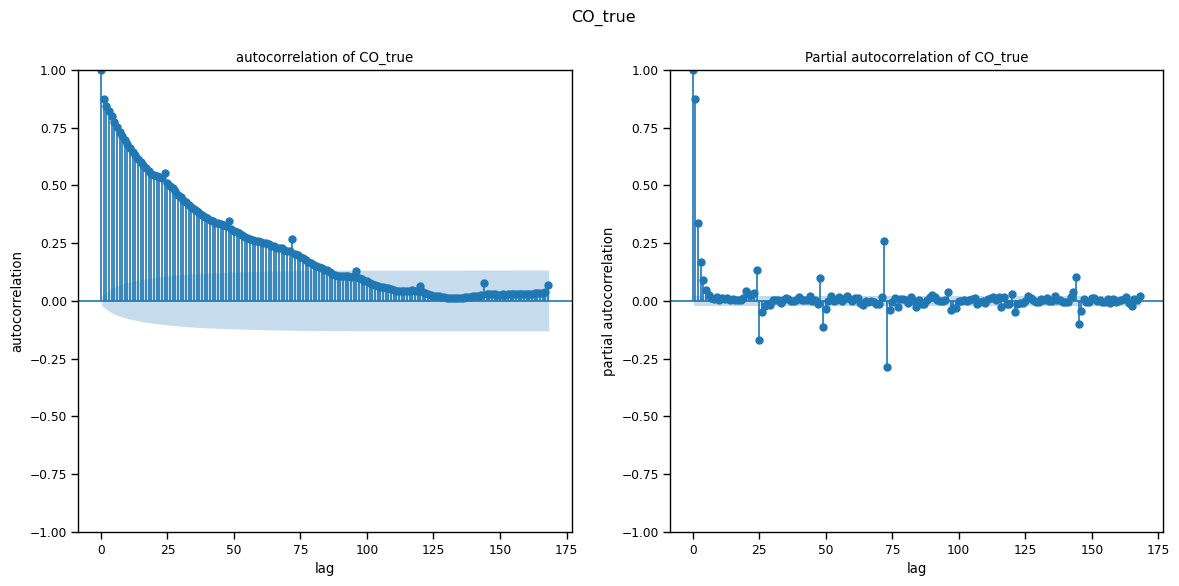

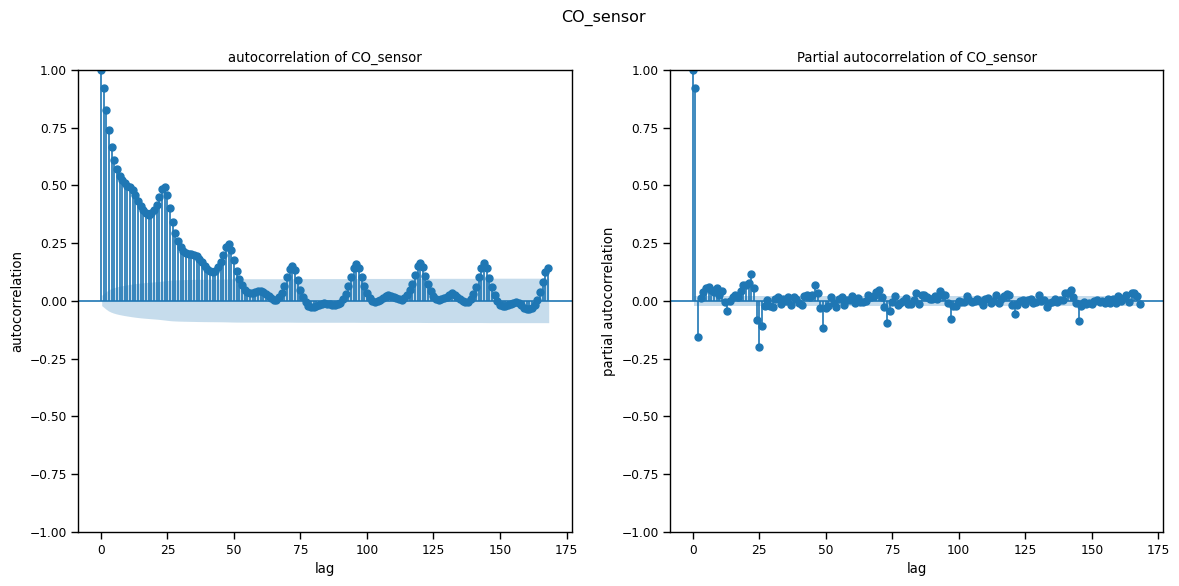

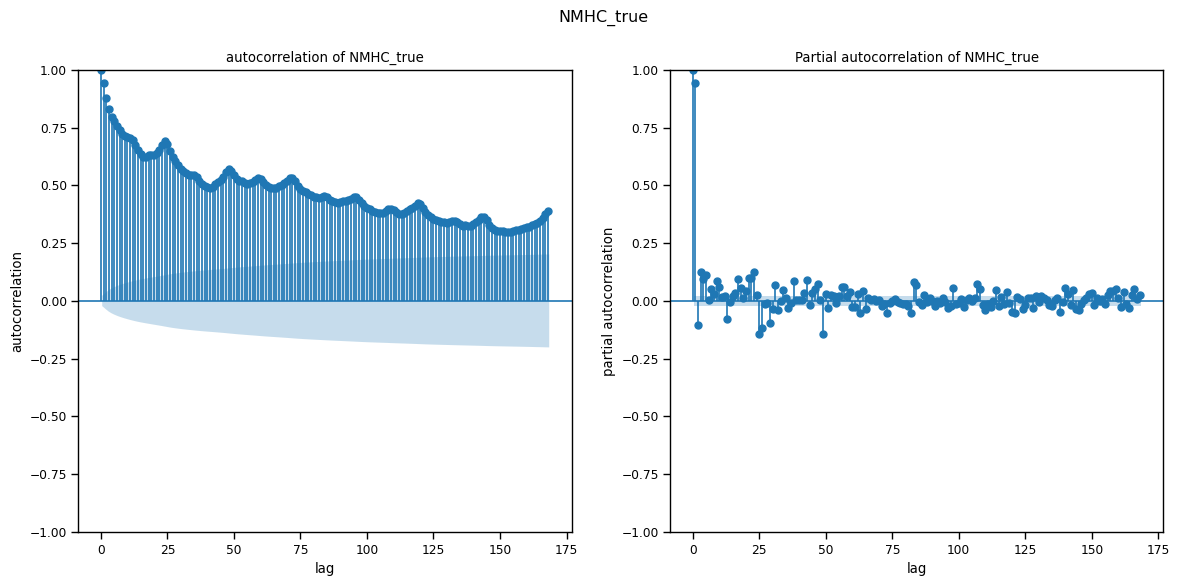

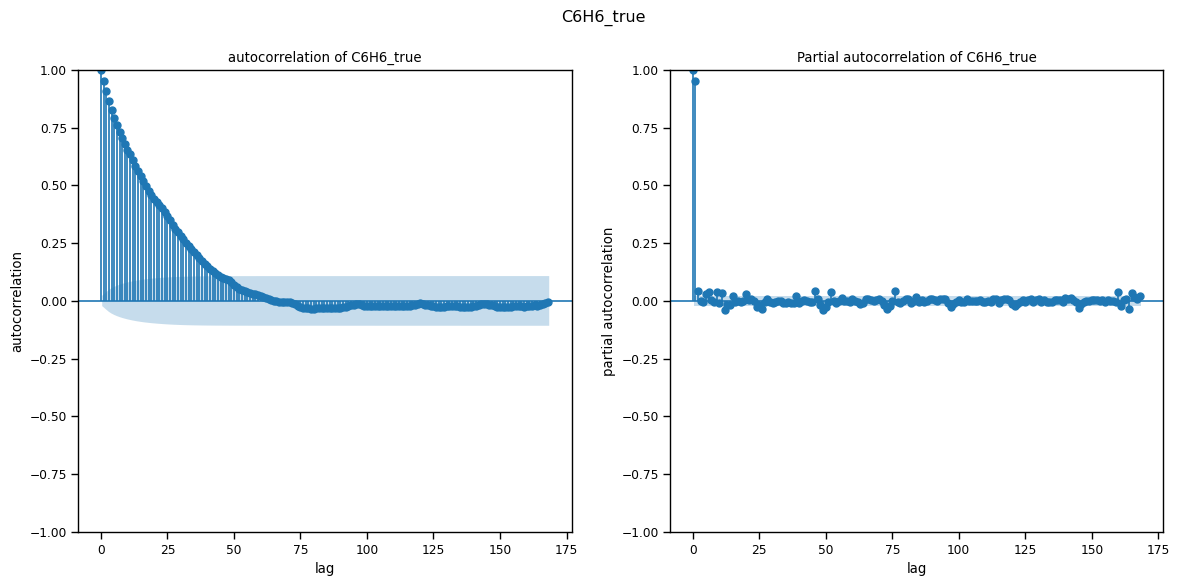

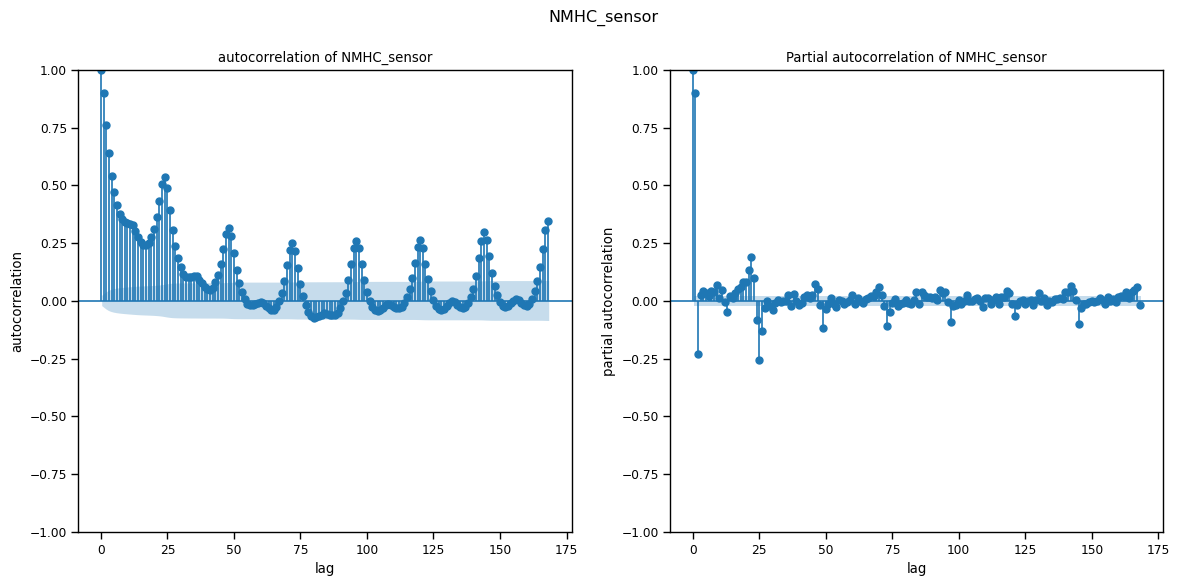

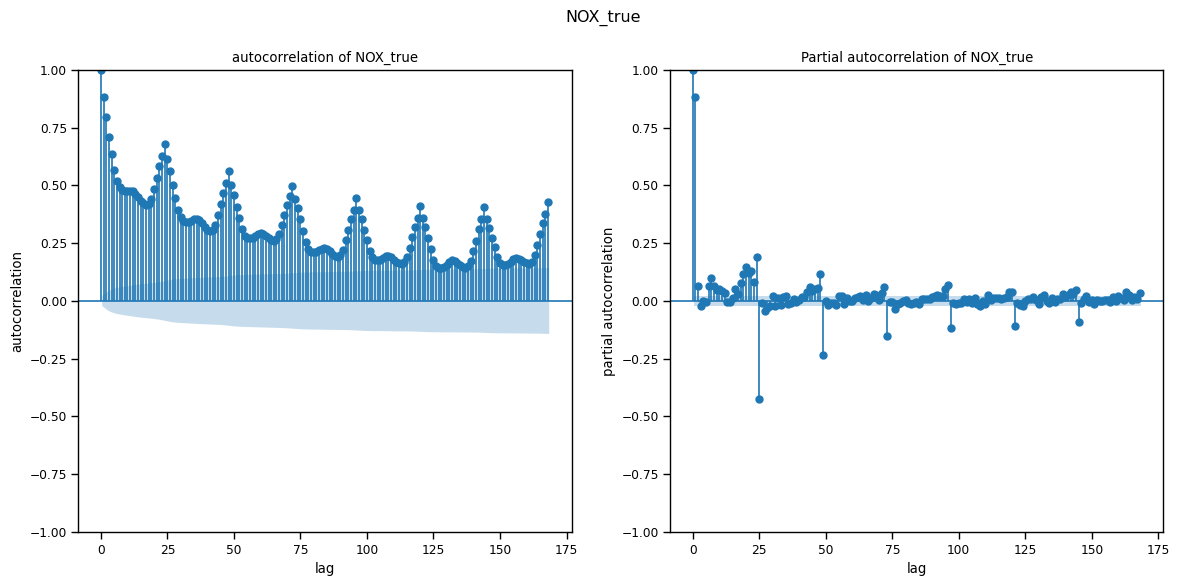

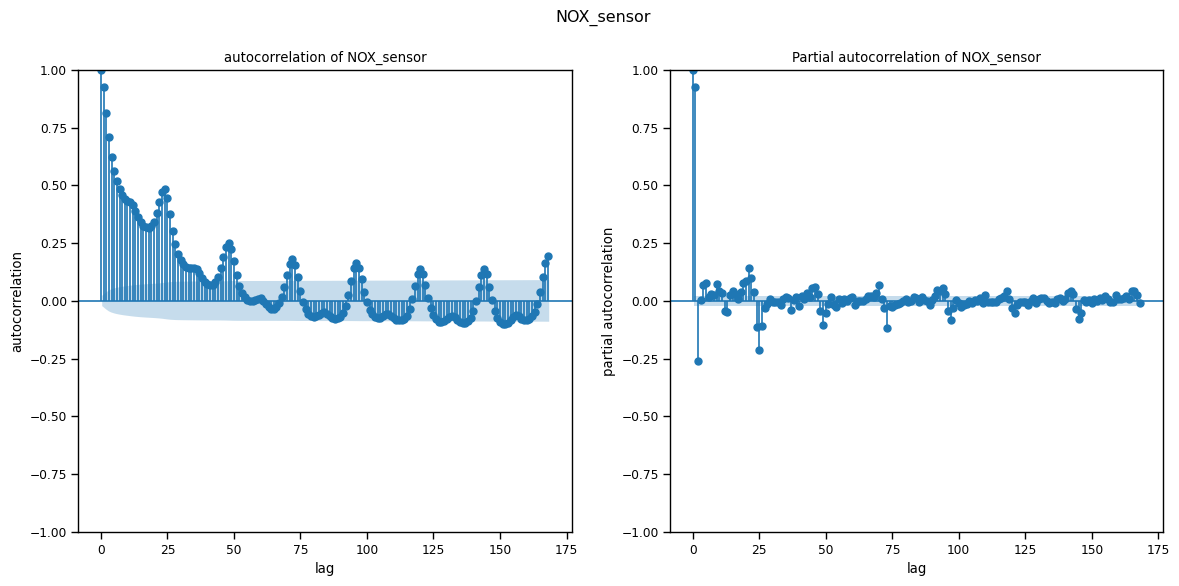

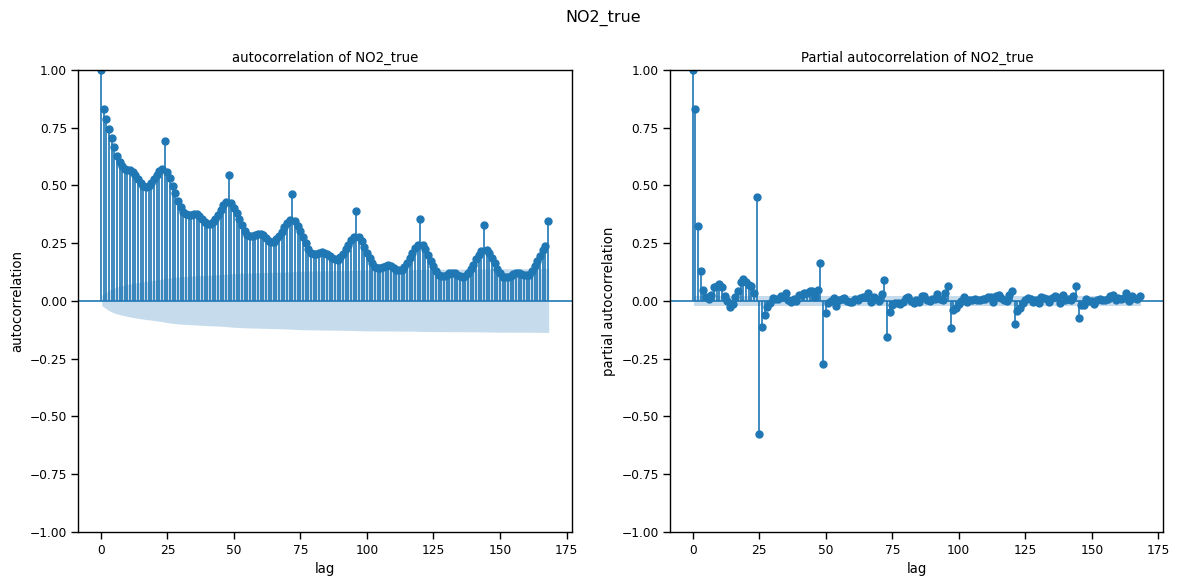

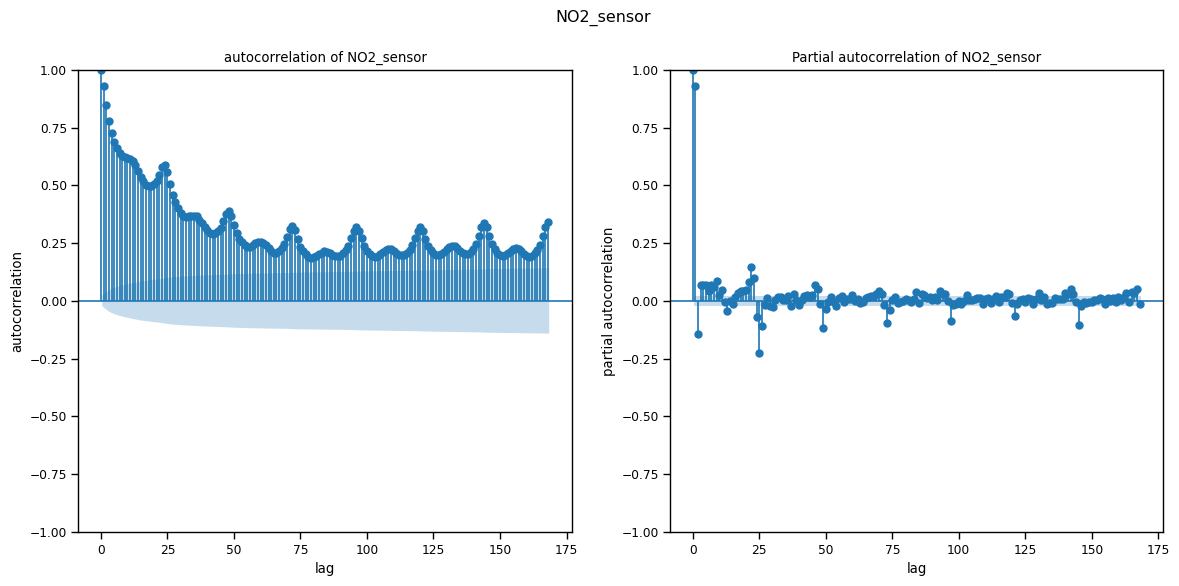

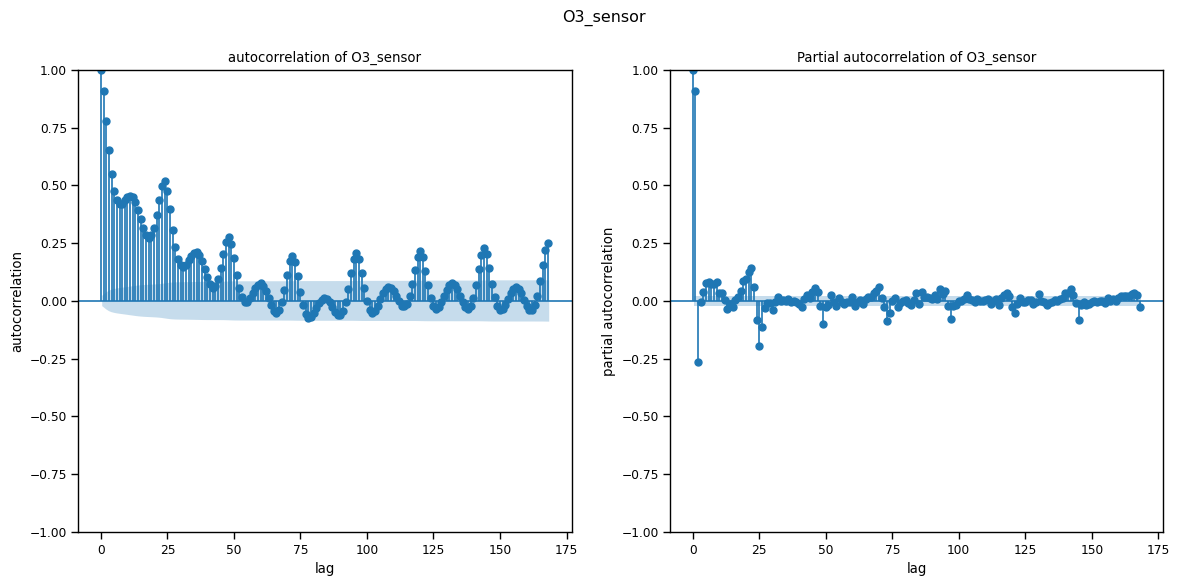

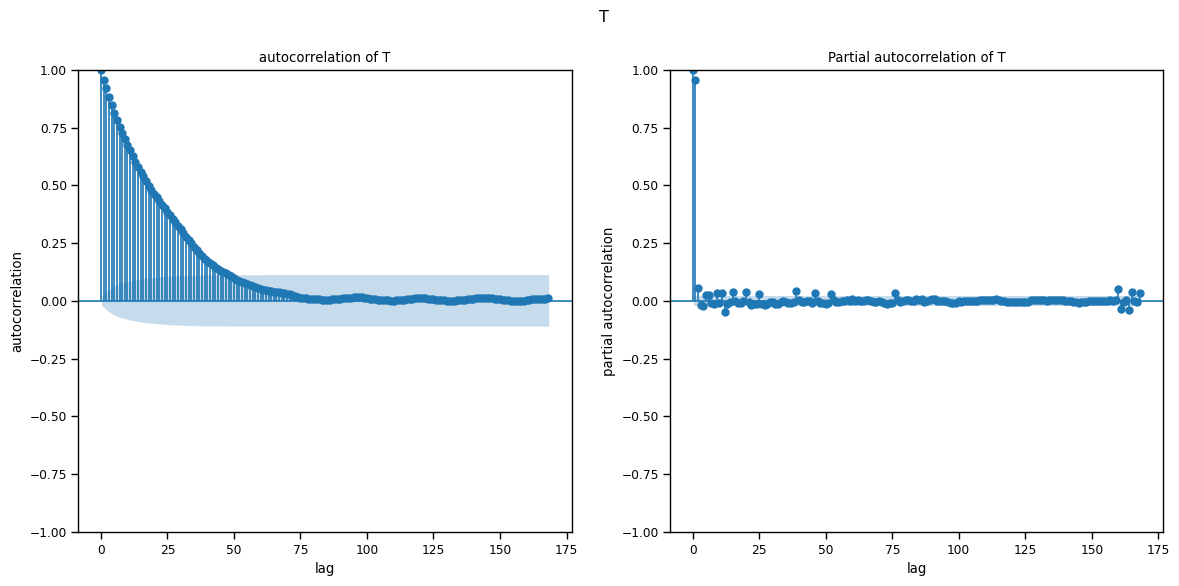

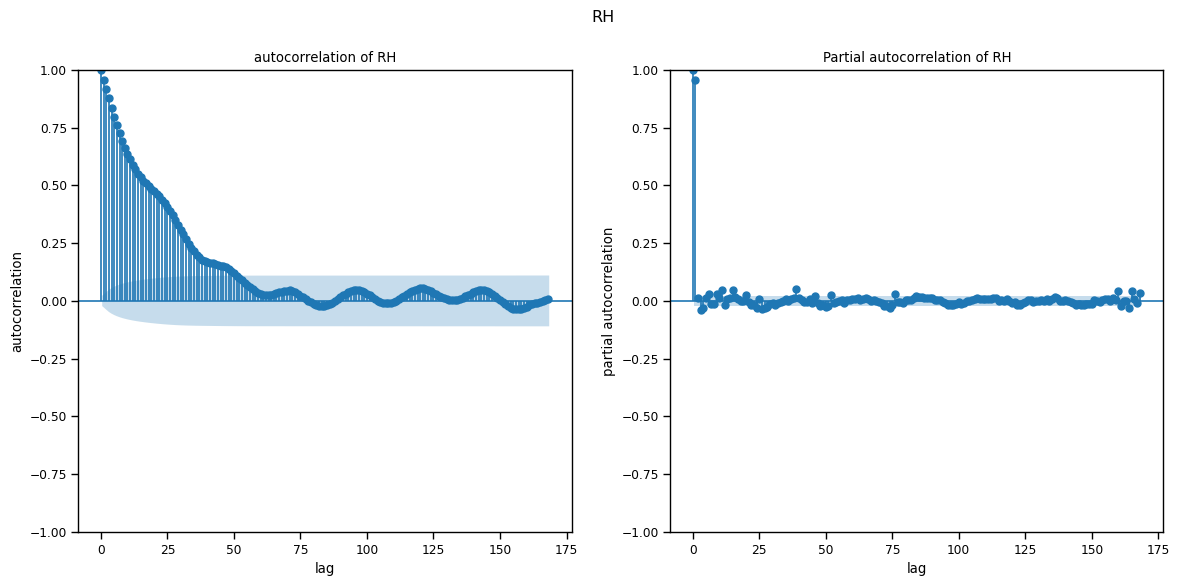

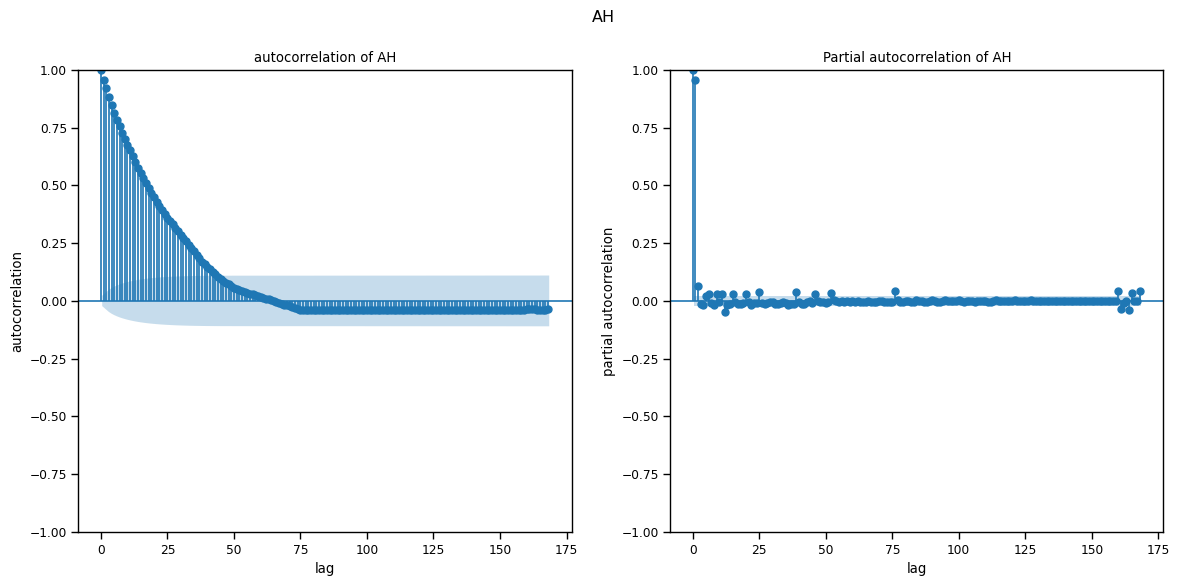

In [42]:
for i in data.columns:
    fig,ax=plt.subplots(ncols=2,figsize=[14,6])
    plot_acf(data[i],lags=7*24,ax=ax[0])
    ax[0].set_title(f"autocorrelation of {i}")
    ax[0].set_xlabel("lag")
    ax[0].set_ylabel("autocorrelation")
    
    plot_pacf(data[i],lags=7*24,ax=ax[1],method="ywmle")
    ax[1].set_title(f"Partial autocorrelation of {i}")
    ax[1].set_xlabel("lag")
    ax[1].set_ylabel("partial autocorrelation")
    
    fig.suptitle(i)

ACF shows the peak at 24 hours and some shows peak at 12 hours where as the PACF shows peak at 24 hours

Now lets check for 3 days ago to be sure 

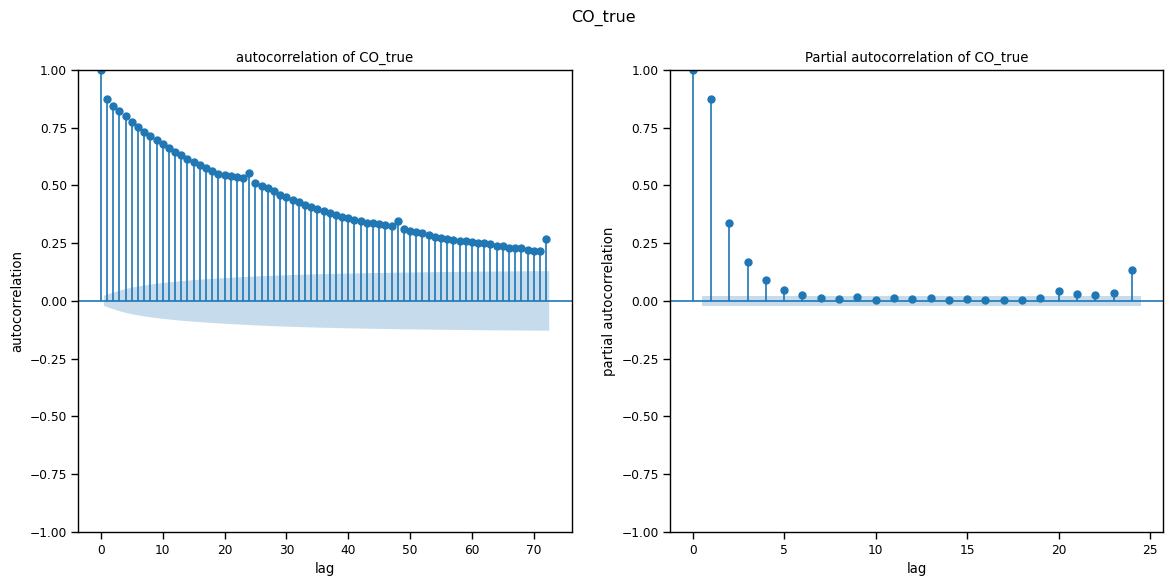

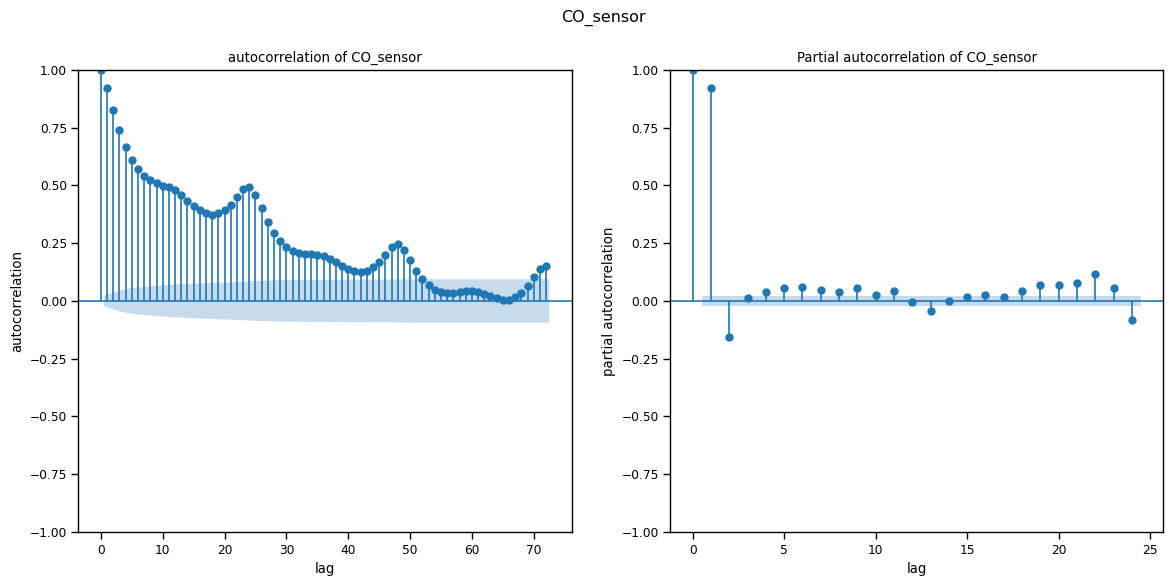

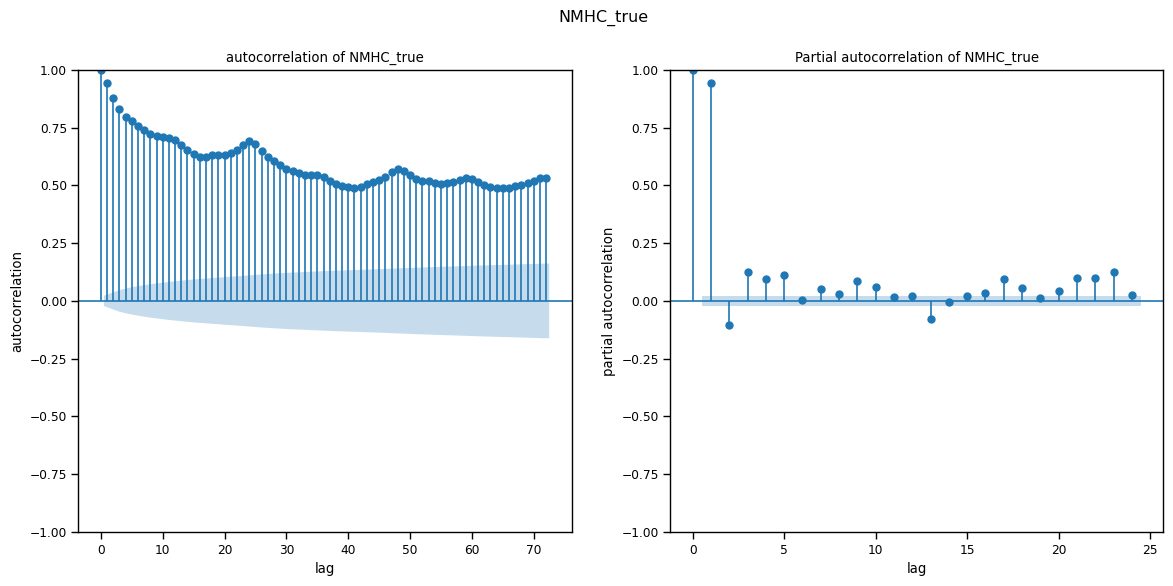

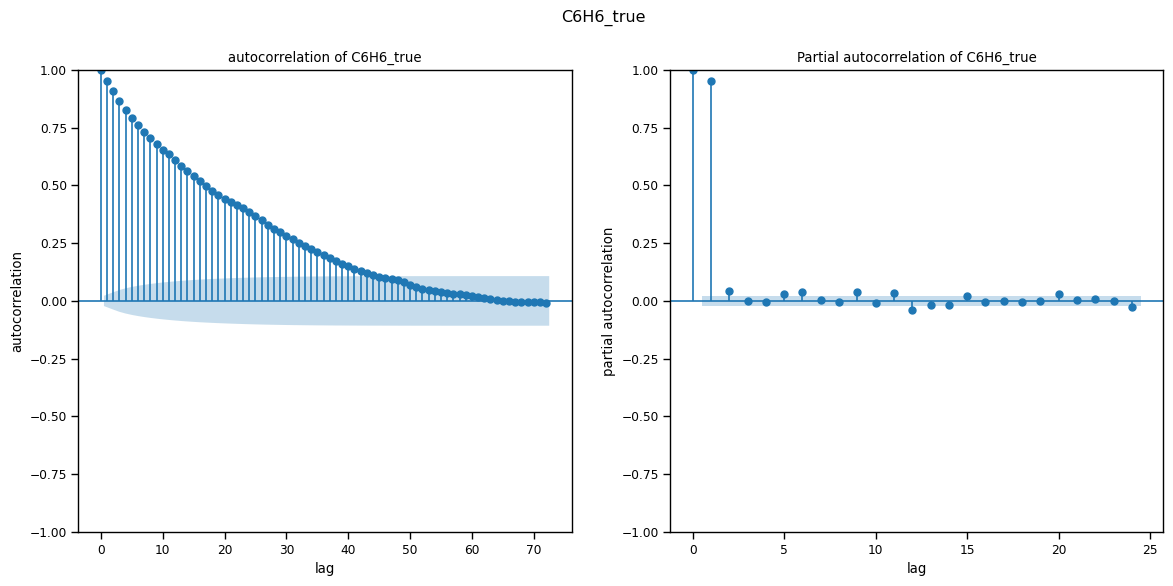

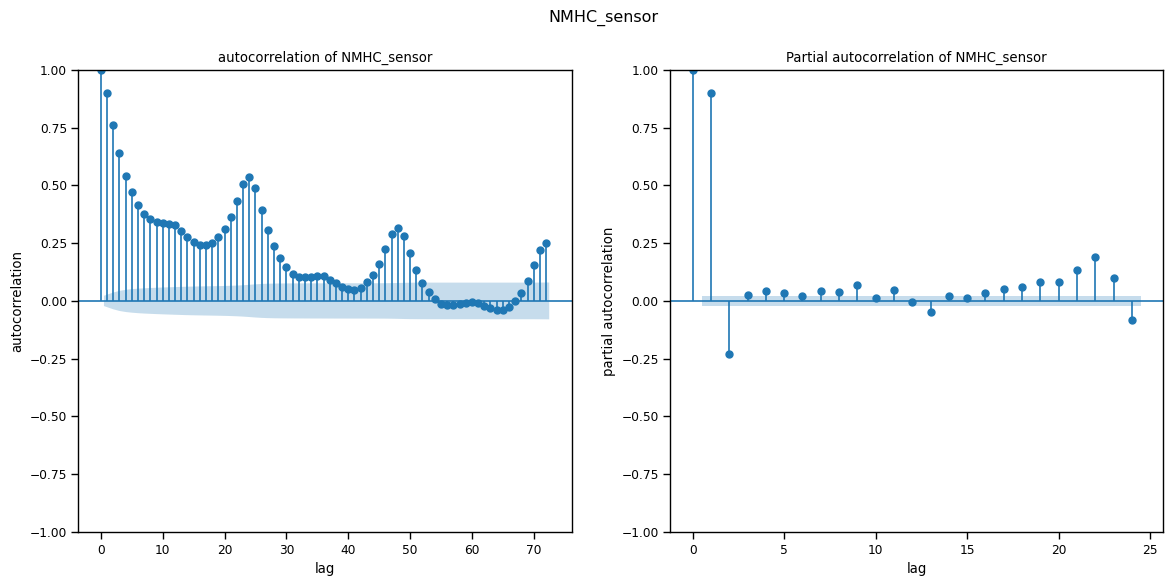

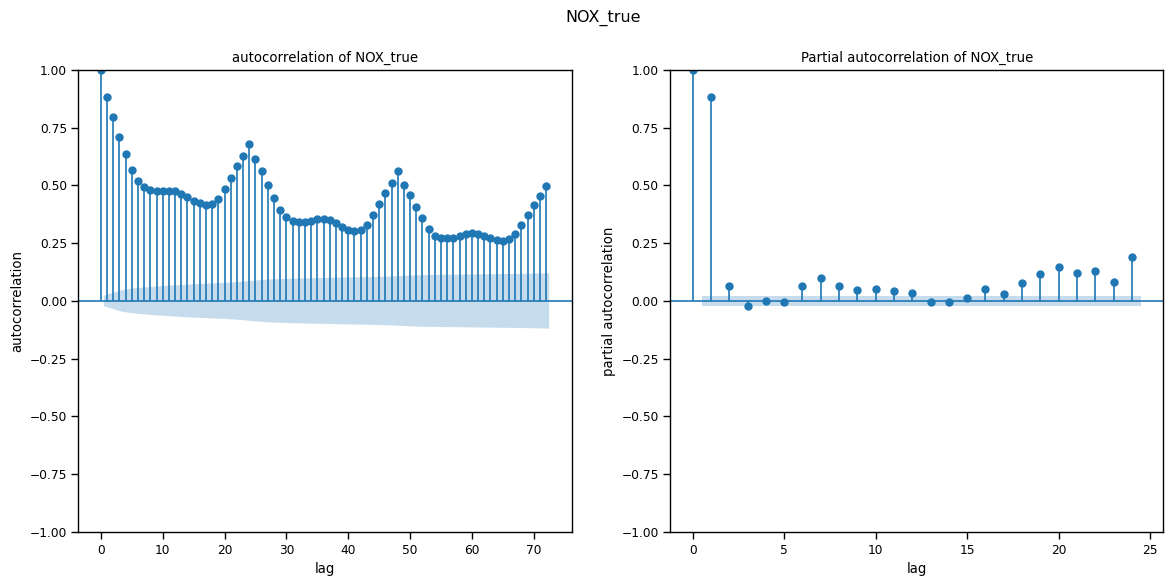

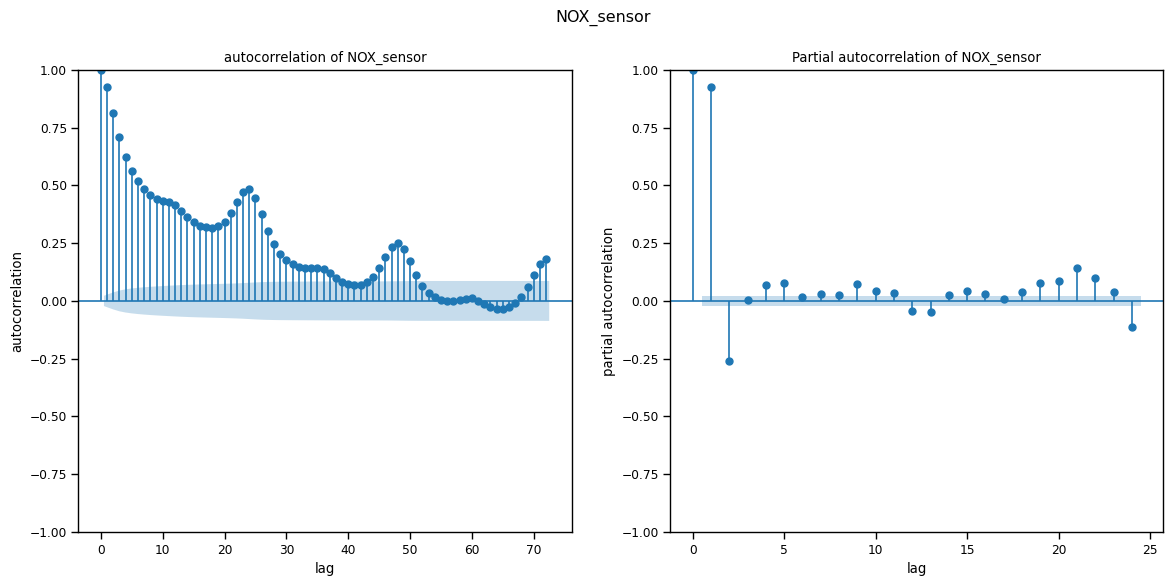

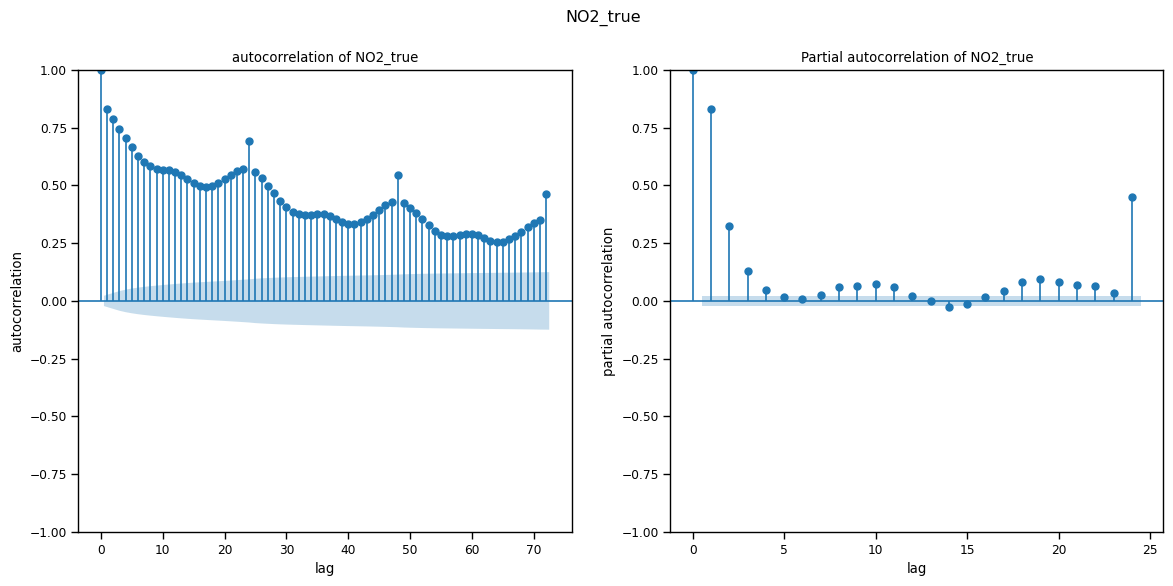

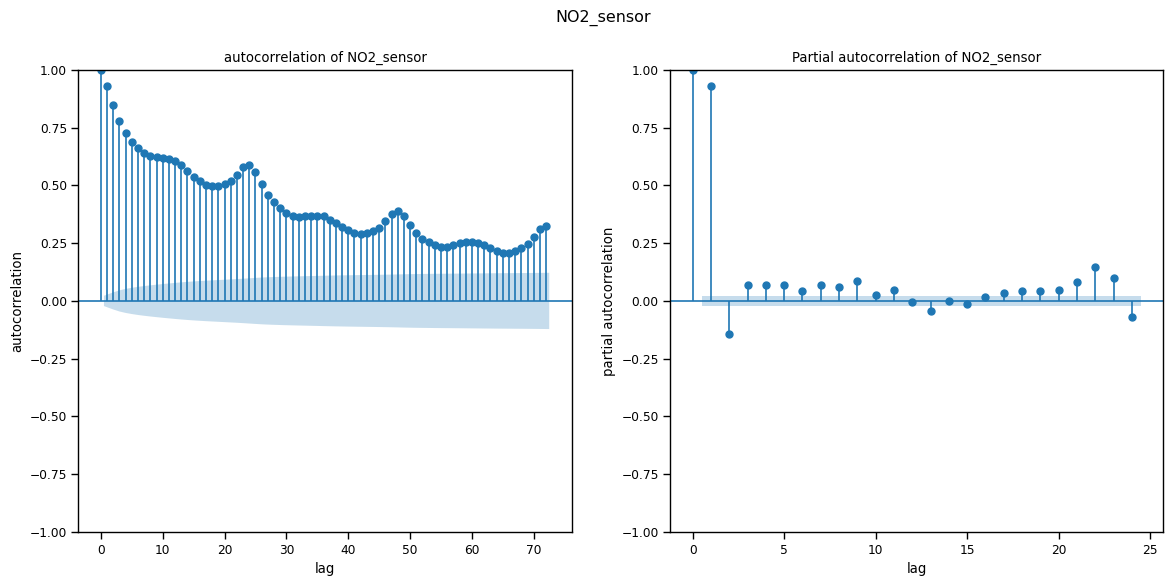

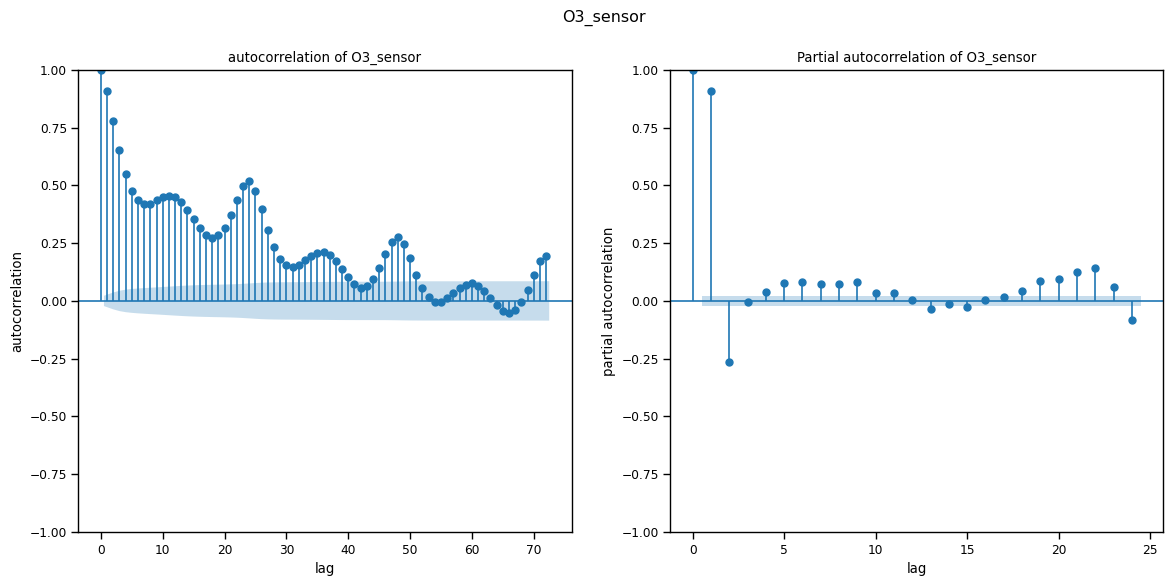

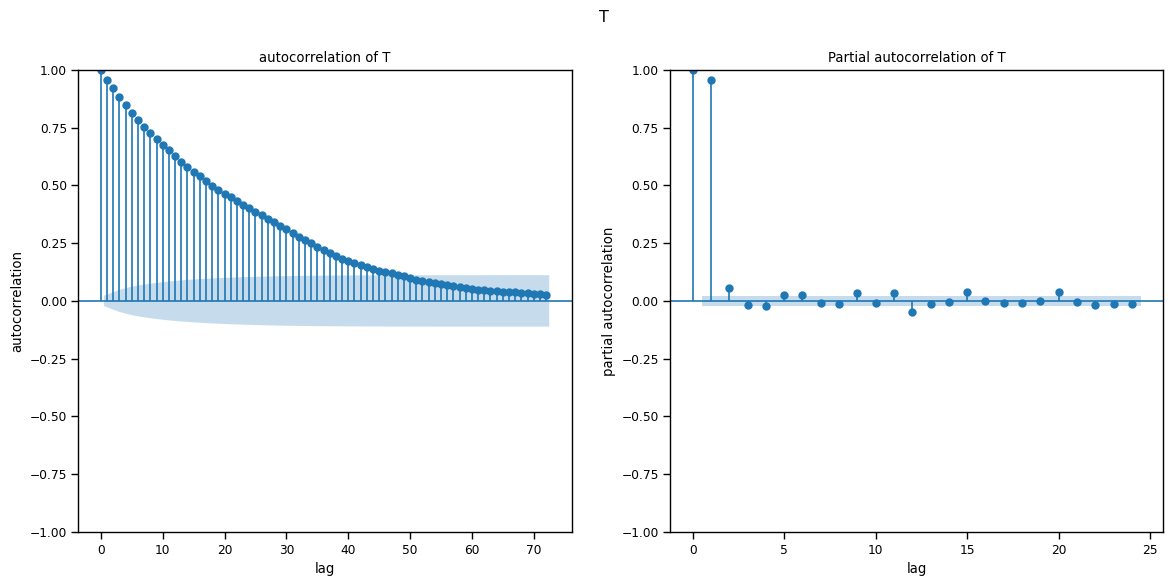

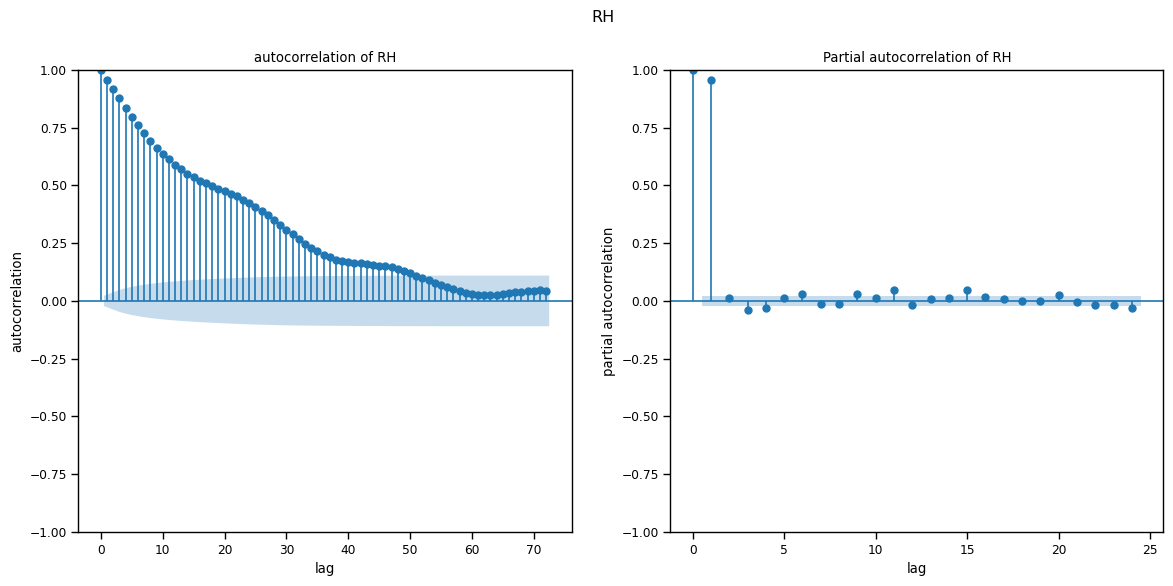

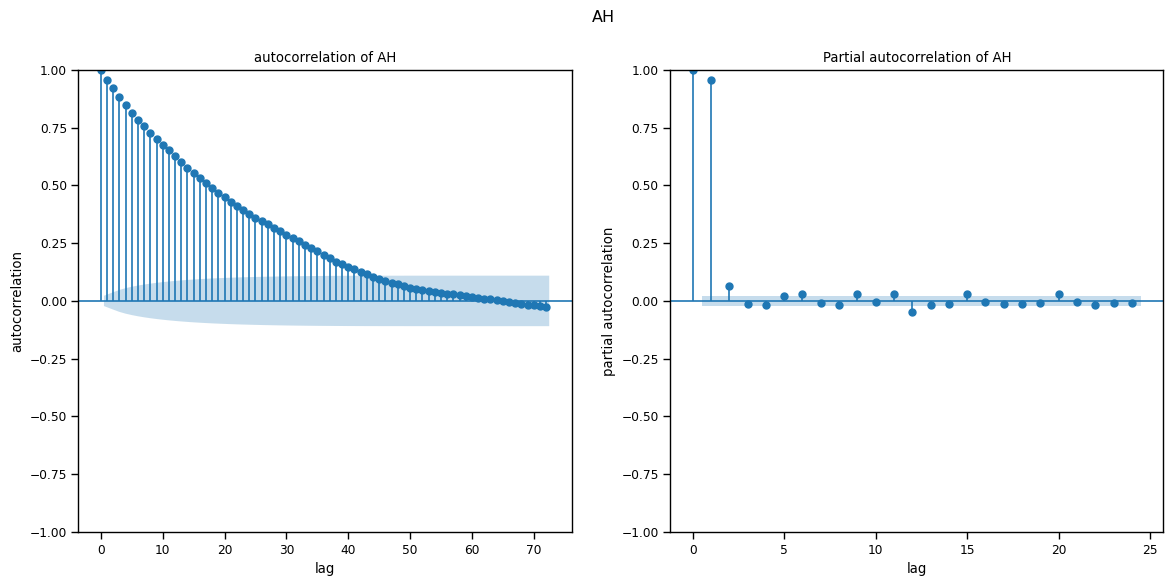

In [43]:
for i in data.columns:
    fig,ax=plt.subplots(ncols=2,figsize=[14,6])
    plot_acf(data[i],lags=3*24,ax=ax[0])
    ax[0].set_title(f"autocorrelation of {i}")
    ax[0].set_xlabel("lag")
    ax[0].set_ylabel("autocorrelation")
    
    plot_pacf(data[i],lags=1*24,ax=ax[1],method="ywmle")
    ax[1].set_title(f"Partial autocorrelation of {i}")
    ax[1].set_xlabel("lag")
    ax[1].set_ylabel("partial autocorrelation")
    
    fig.suptitle(i)

ACF shows the spike at 12 hours and PACF also confirms there is peak at 12 to 13 hours  according to PACF the most
recent lags matters the most ie 1H...

Now lets check the seasonality on weekely basis

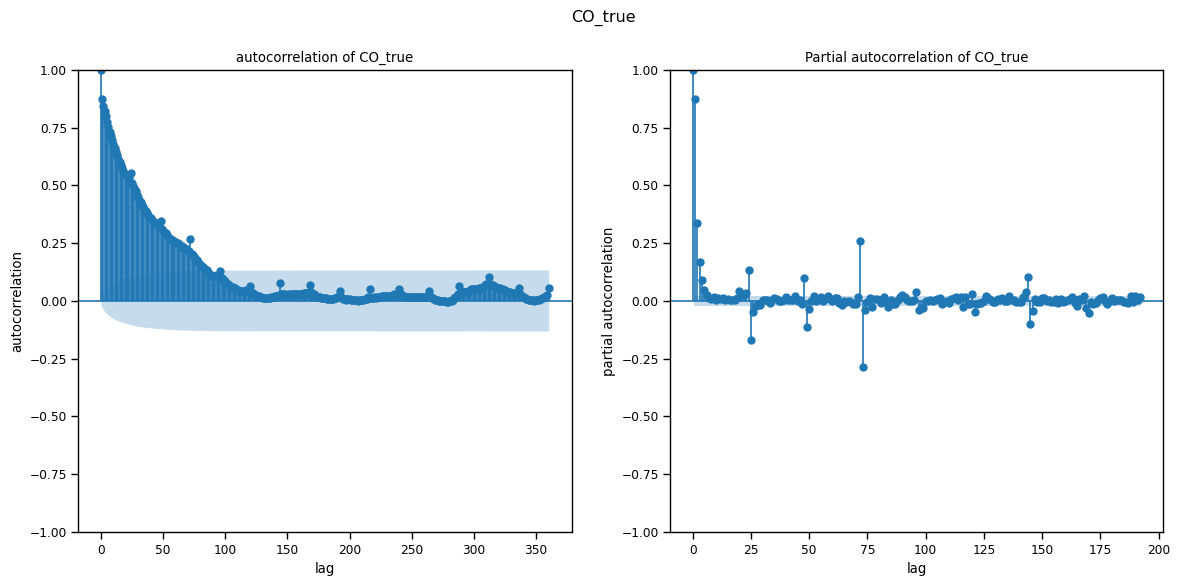

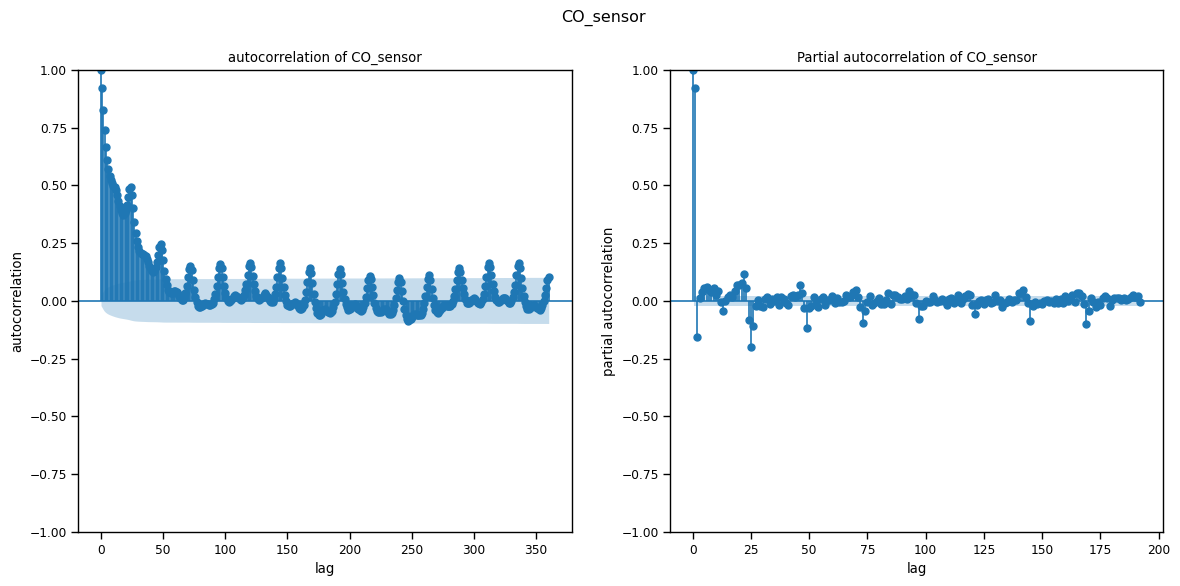

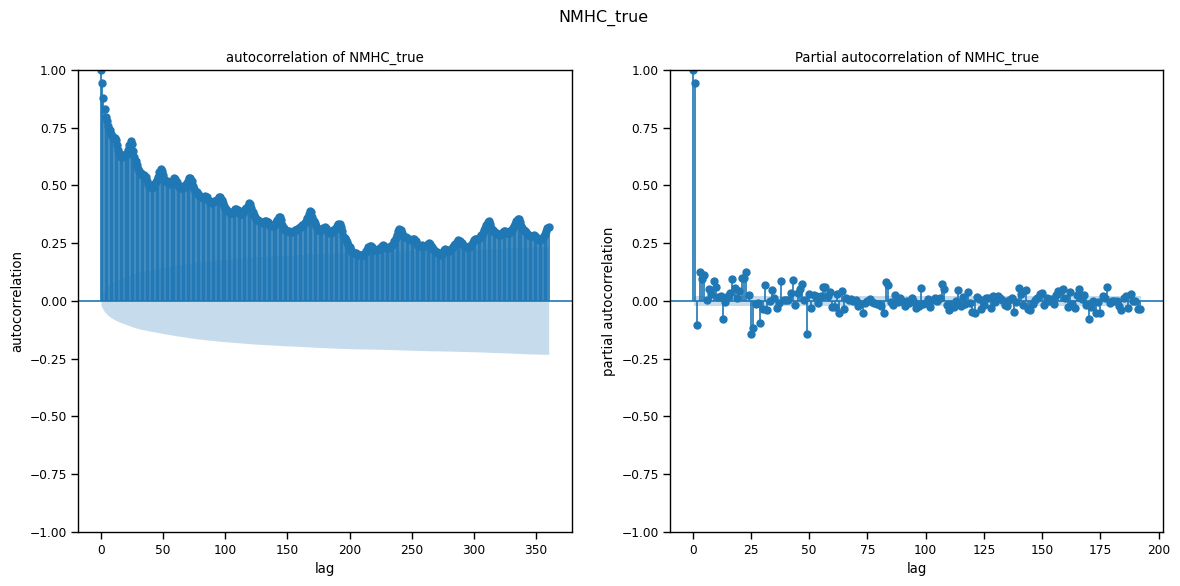

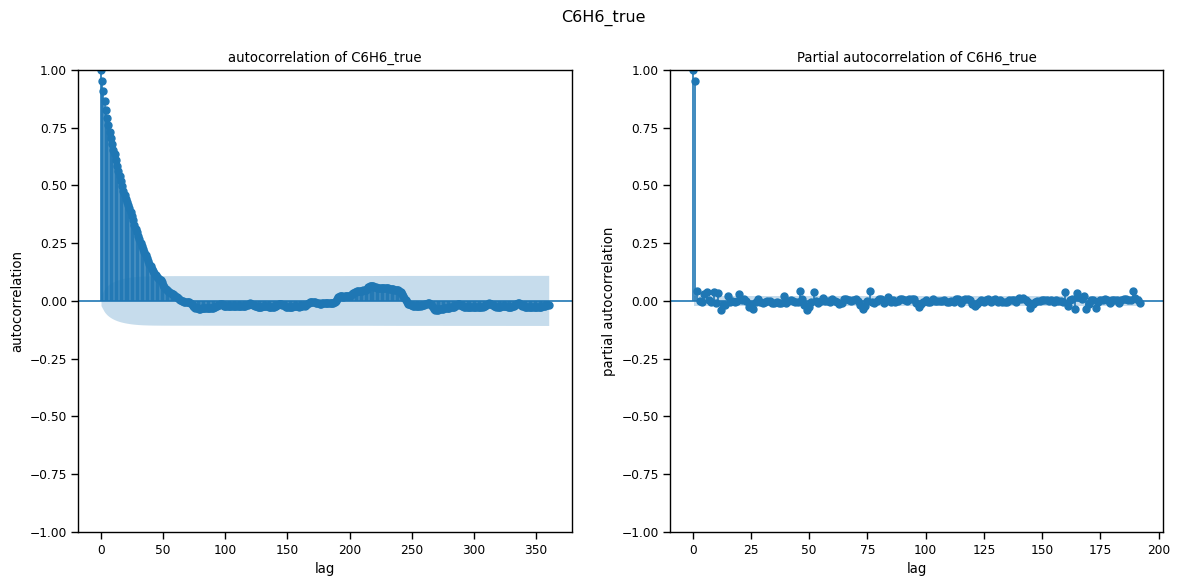

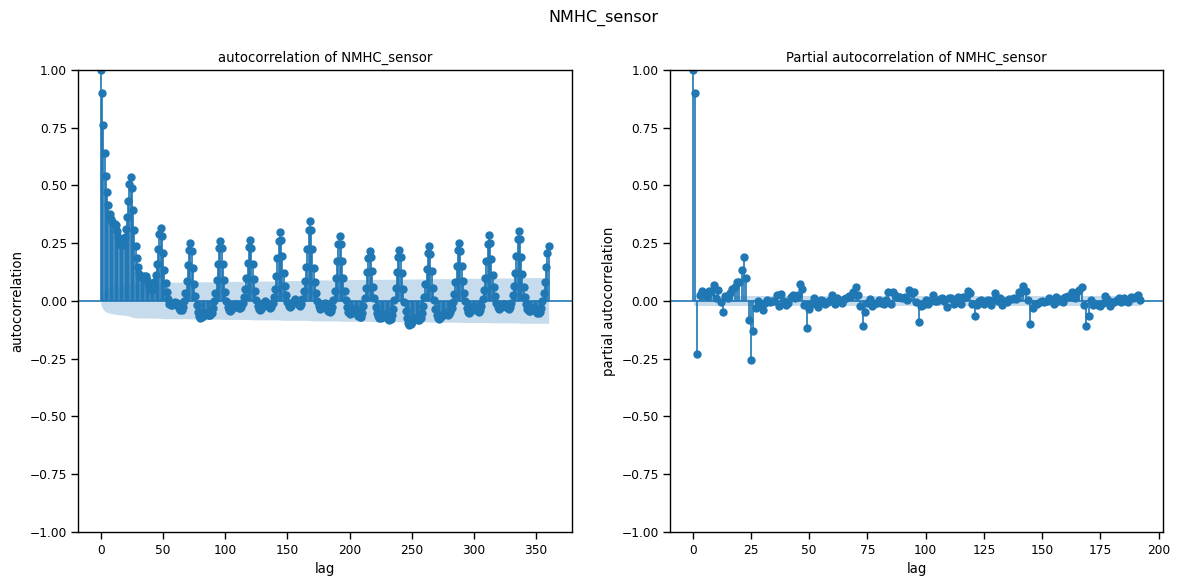

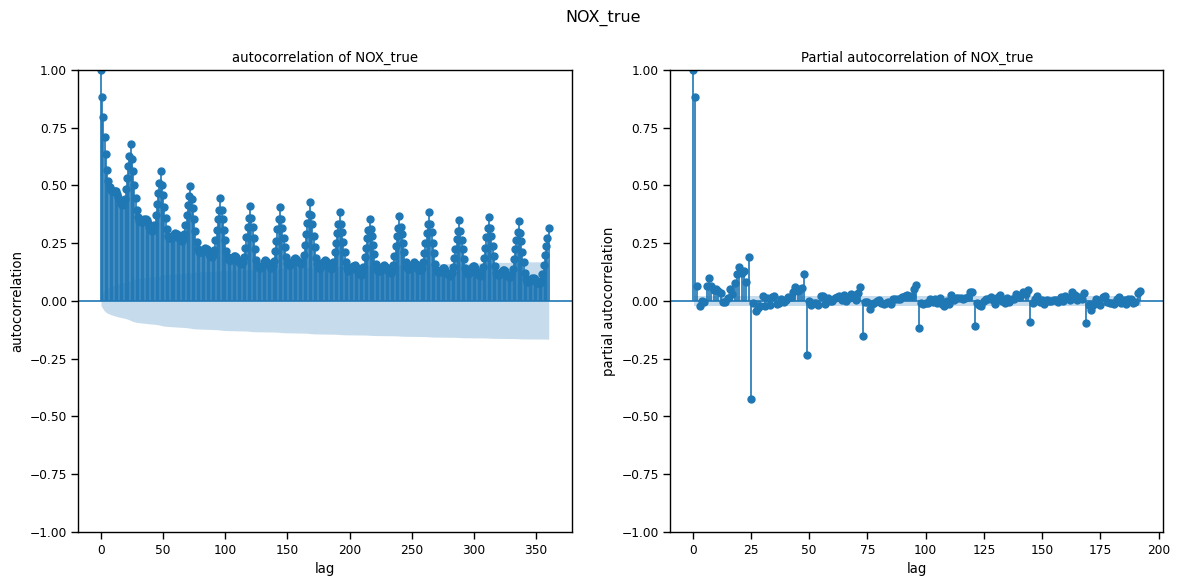

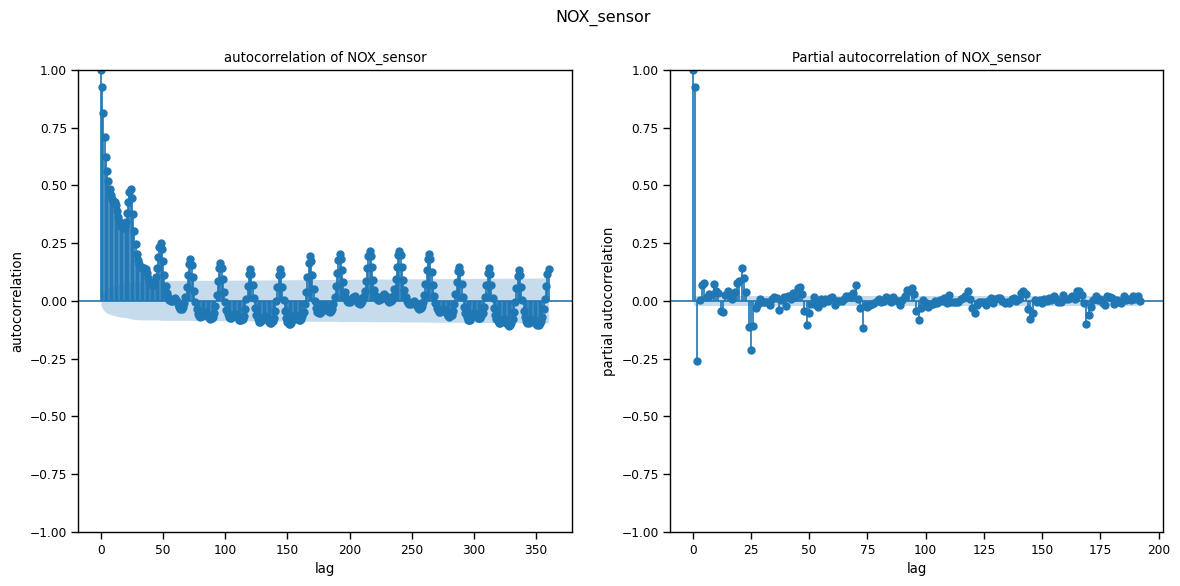

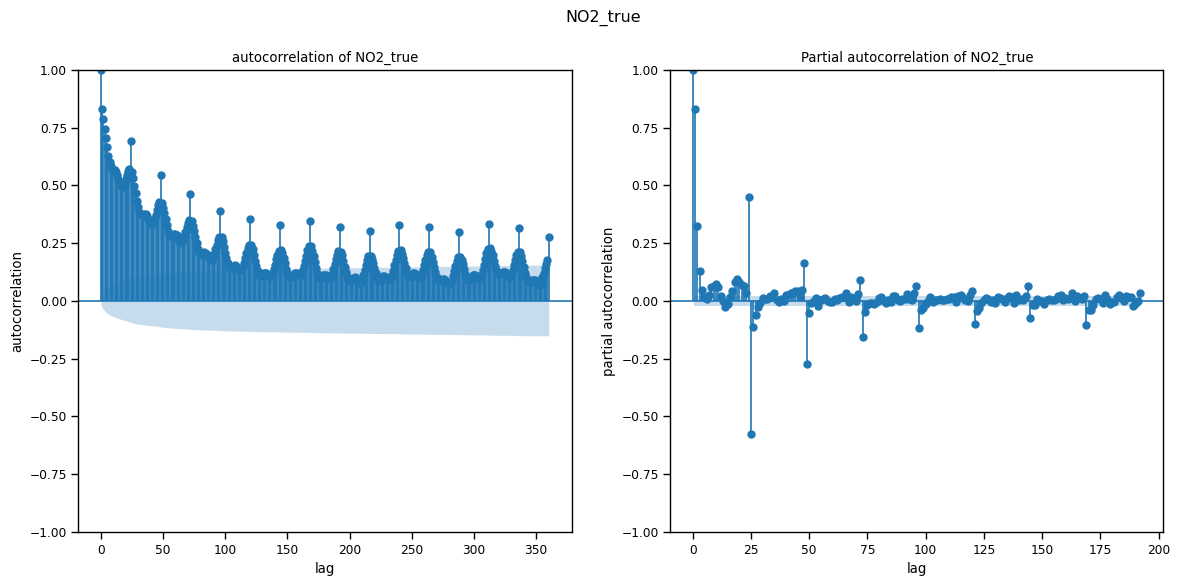

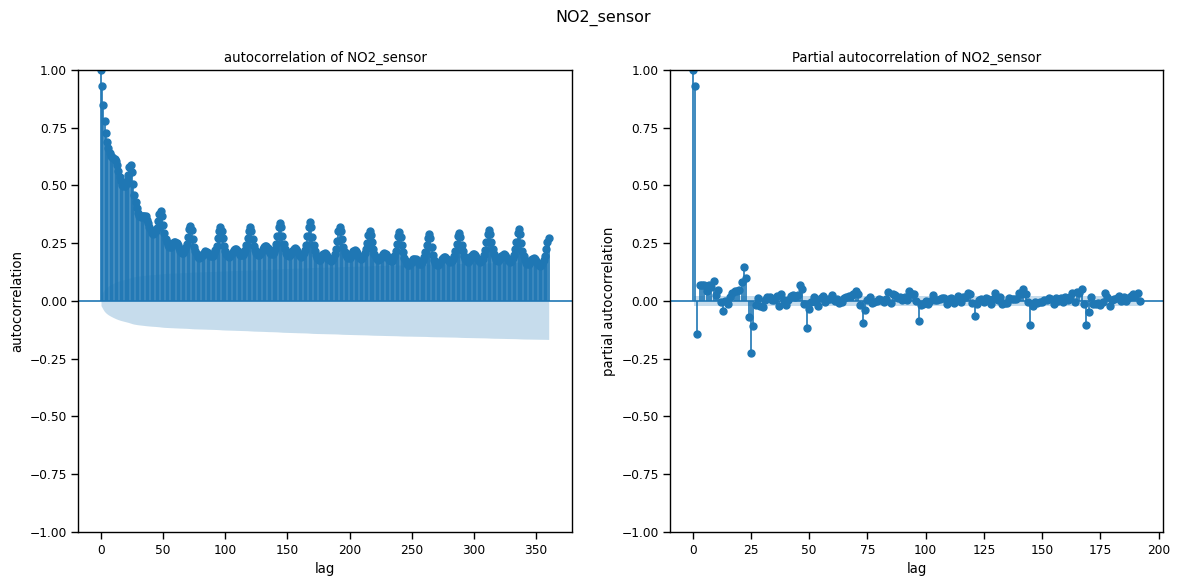

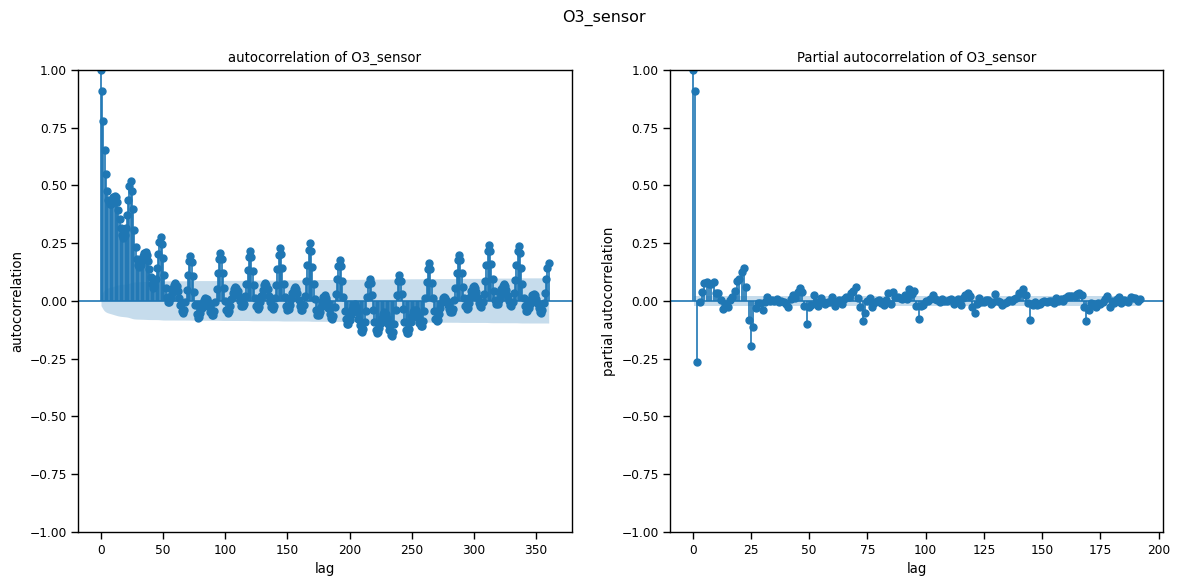

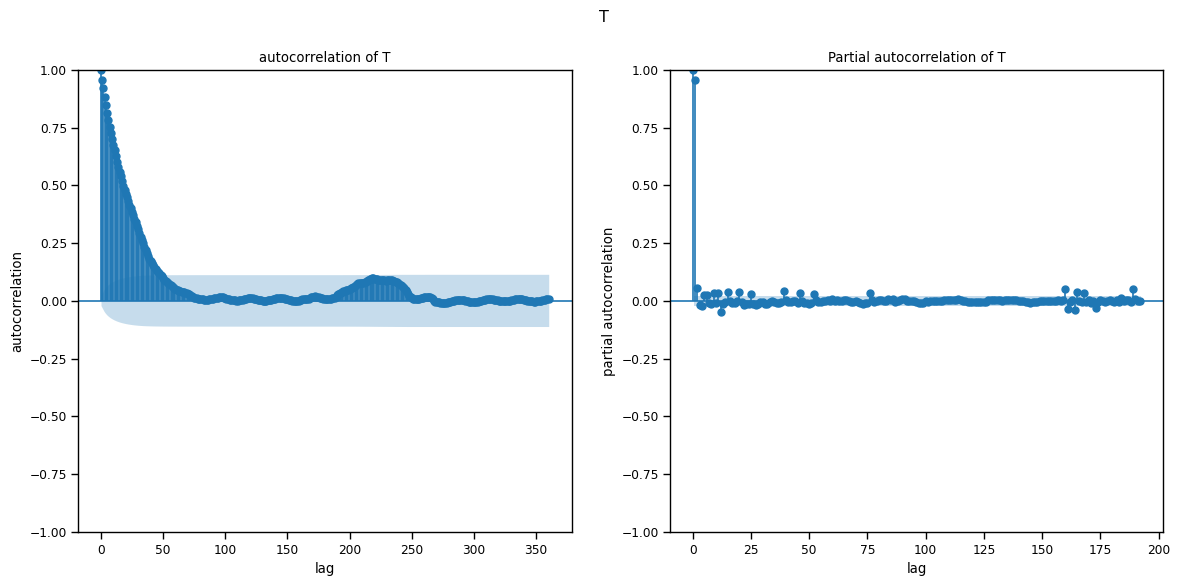

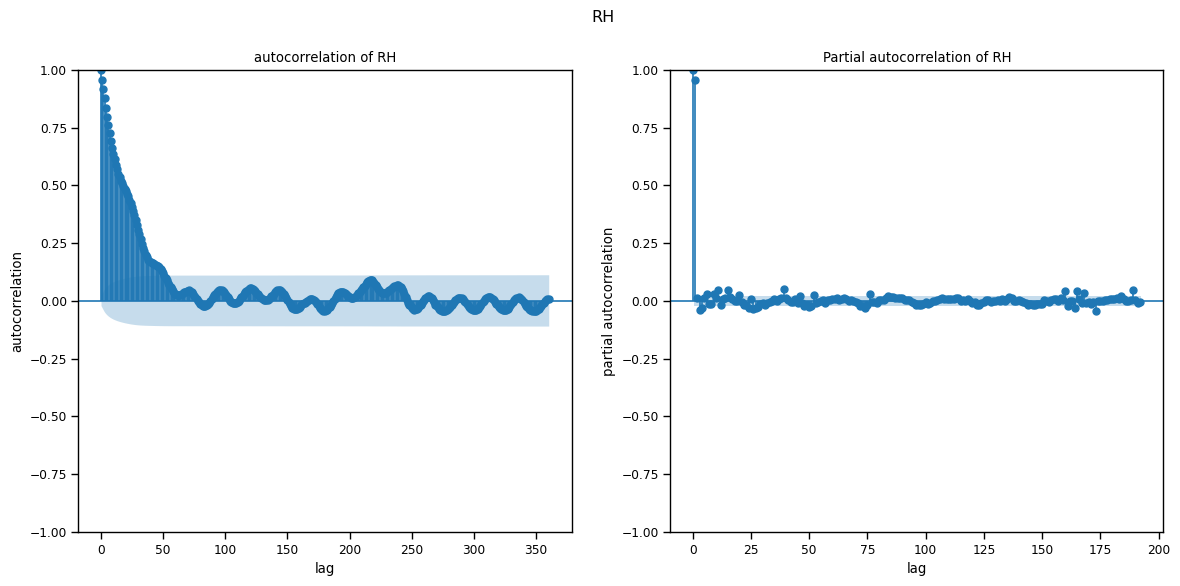

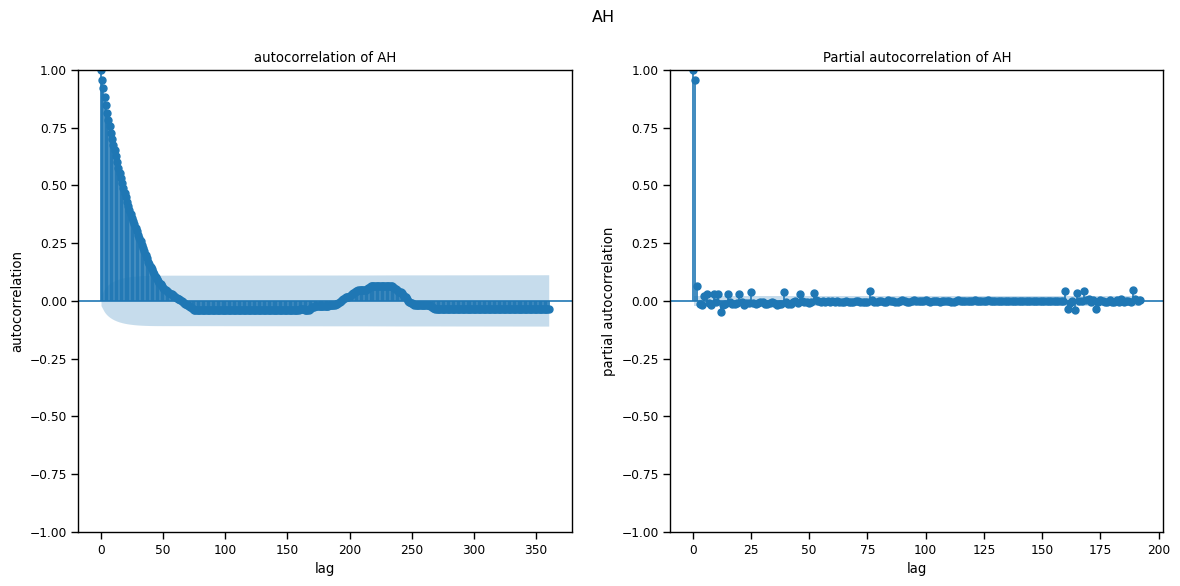

In [44]:
for i in data.columns:
    fig,ax=plt.subplots(ncols=2,figsize=[14,6])
    plot_acf(data[i],lags=15*24,ax=ax[0])
    ax[0].set_title(f"autocorrelation of {i}")
    ax[0].set_xlabel("lag")
    ax[0].set_ylabel("autocorrelation")
    
    plot_pacf(data[i],lags=8*24,ax=ax[1],method="ywmle")
    ax[1].set_title(f"Partial autocorrelation of {i}")
    ax[1].set_xlabel("lag")
    ax[1].set_ylabel("partial autocorrelation")
    
    fig.suptitle(i)

According to ACF there could be another peak at 168 but is not clear by PACF

 from looking at the ACF and PACF we would use recent lags (1 or 2 hours) and seasonal lags (12, 24, and 168 hours)

The PACF assumes that the time series are stationary. We can try making them stationary by removing any trend and the multiple seasonal components using time series decomposition methods

creating functions for crosscorrelations

### Detrended and deseasonalized data

we should use MSTL as the data has multiple seasonal components

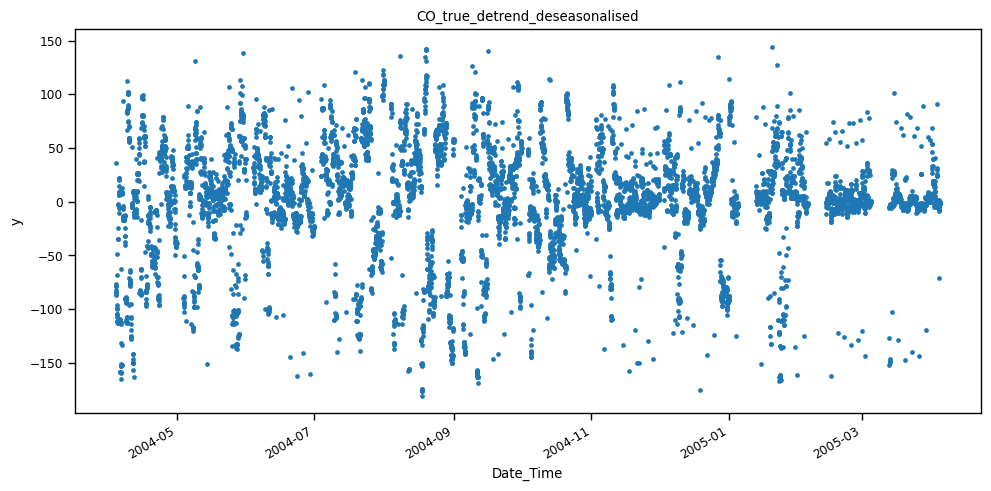

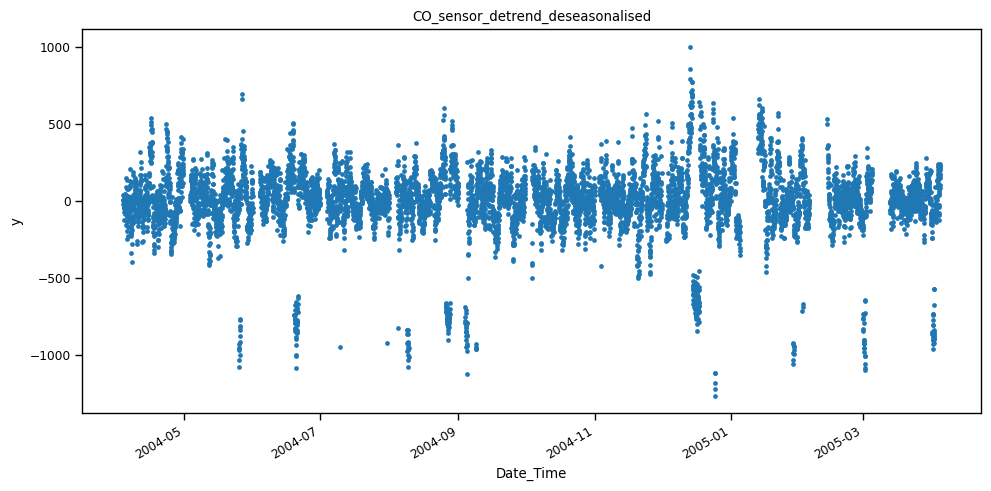

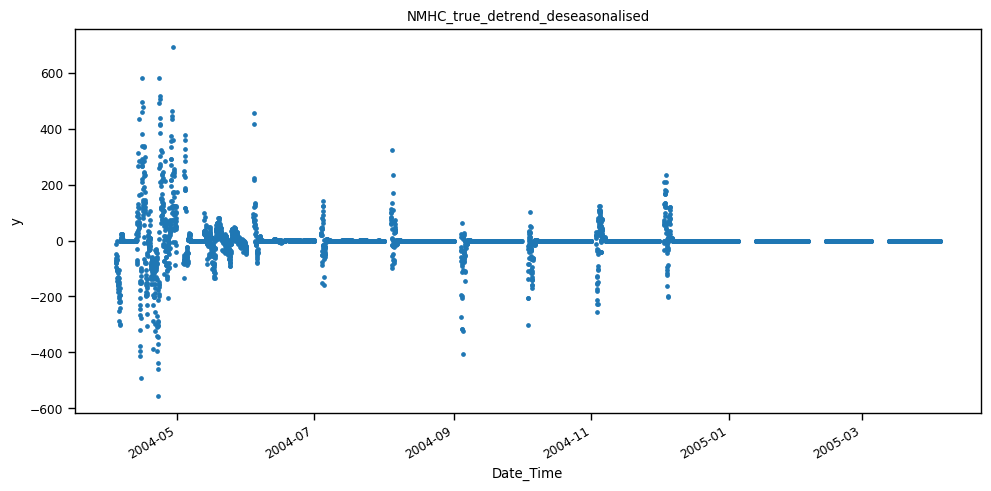

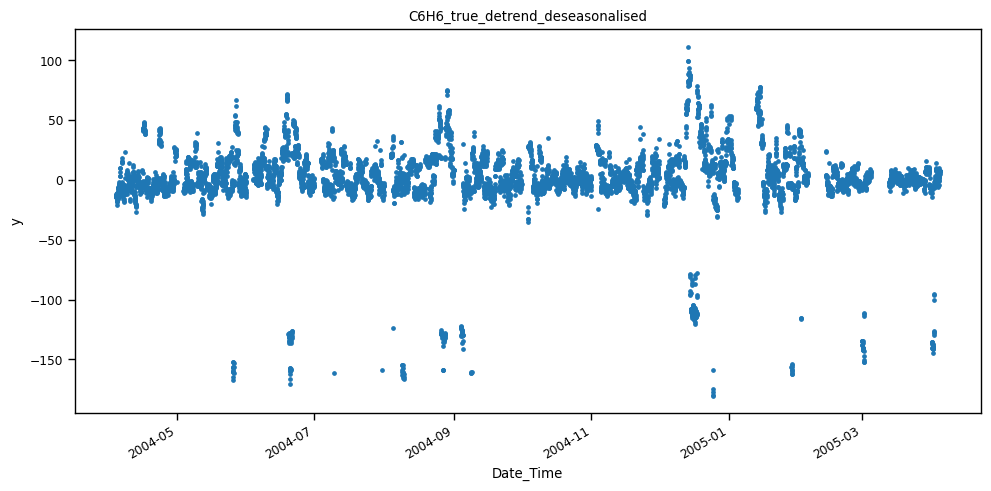

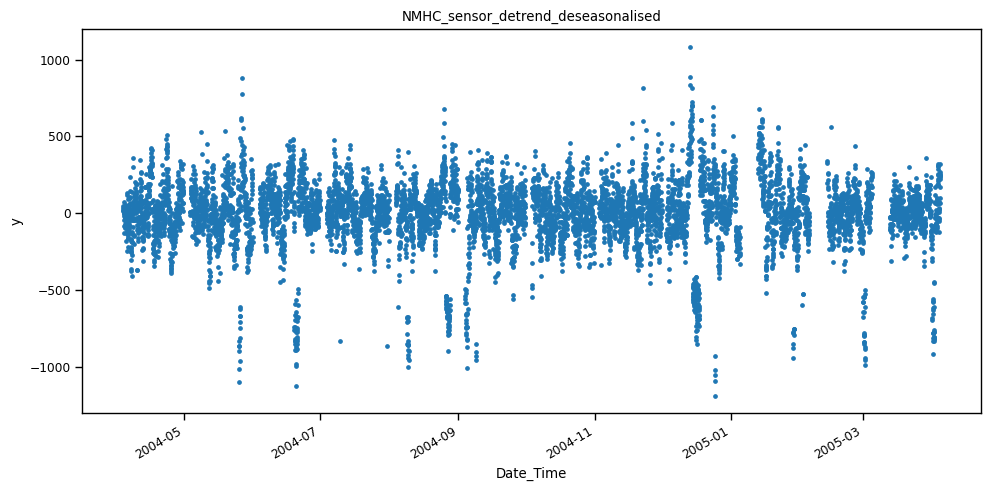

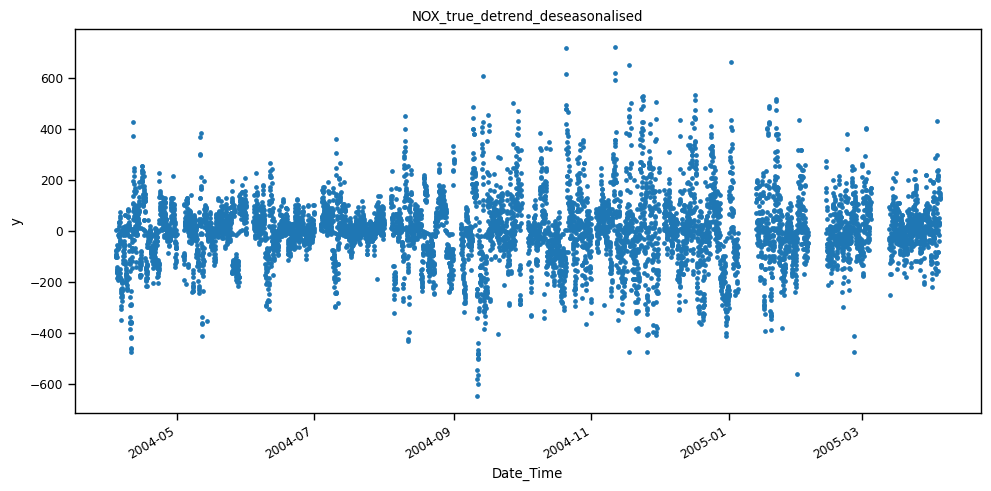

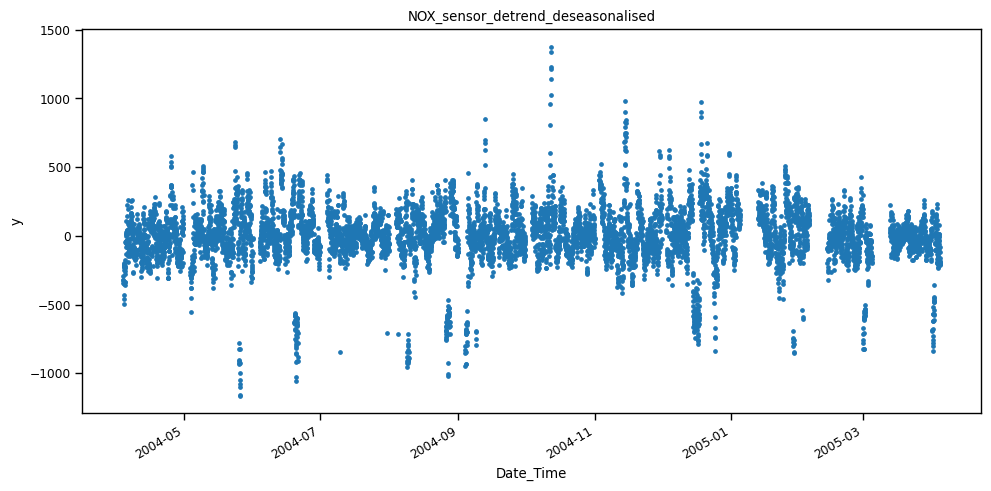

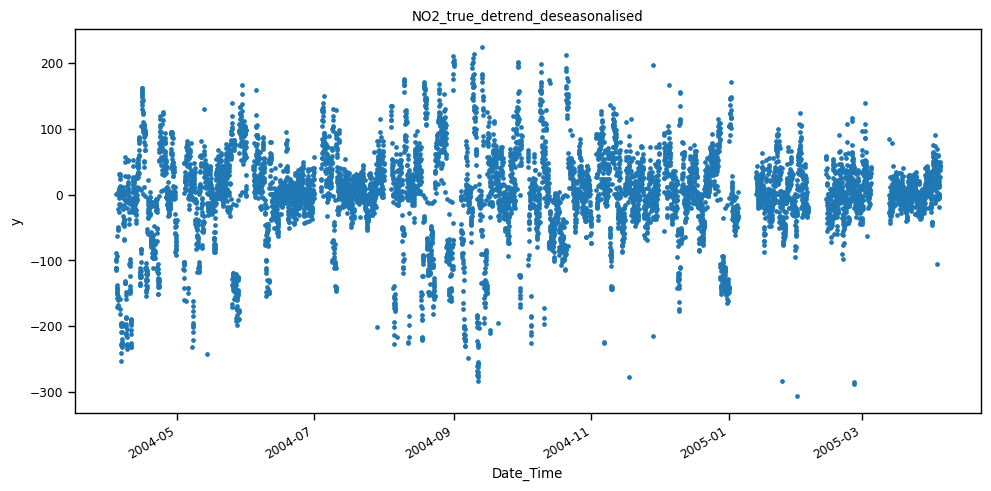

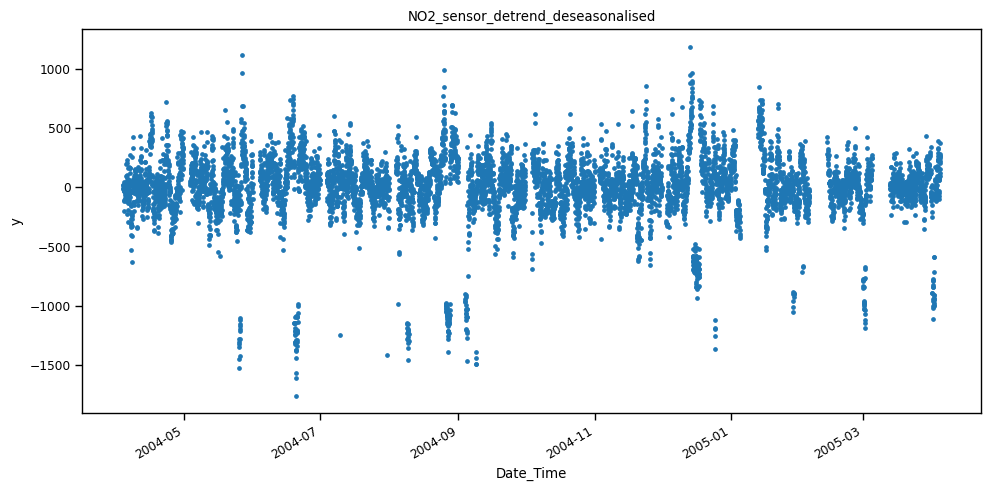

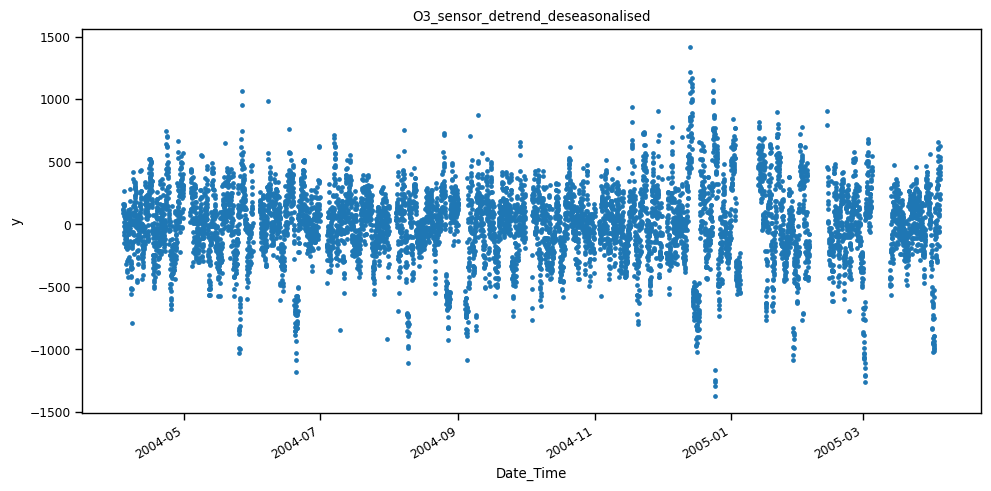

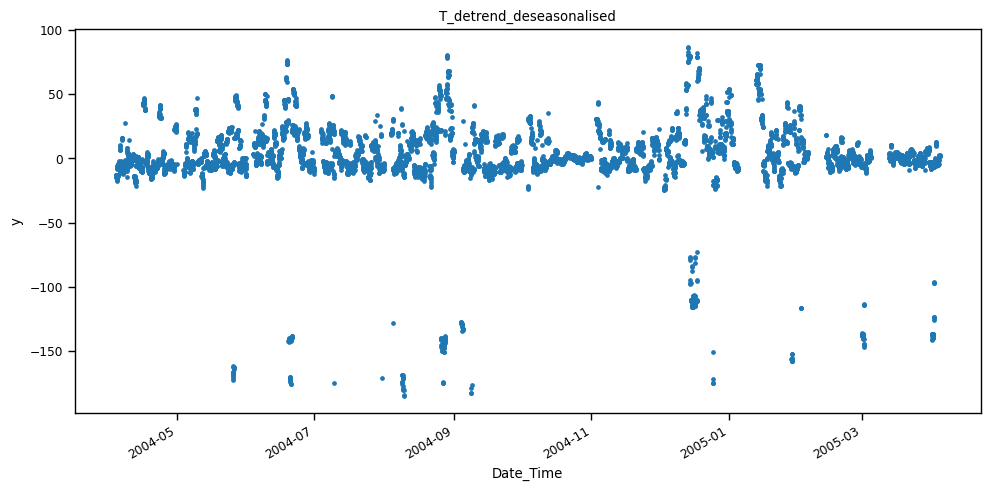

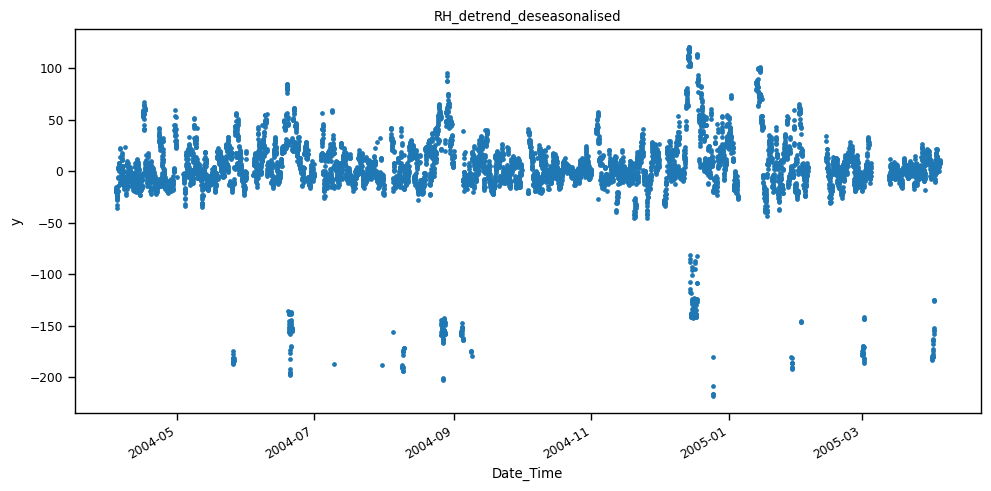

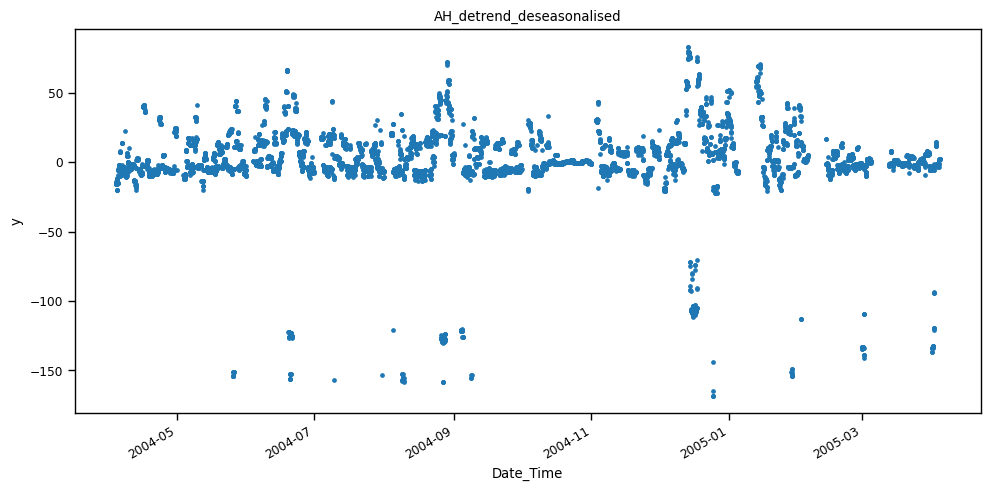

In [45]:
for col in data.columns:
    res = MSTL(
        endog=data[col],
        periods=[24, 24 * 7],  # daily , weeeeekly seasonality
    ).fit()
    fig, ax = plt.subplots(ncols=1, figsize=[10, 5])
    res.resid.plot(ax=ax, marker=".", linestyle="None")
    ax.set_ylabel("y")
    col_name = col + "_detrend_deseasonalised"
    ax.set_title(col_name)
    data[col_name] = res.resid
    plt.tight_layout()

In [46]:
# lets see ACF and PACF of these without trend and seasonality

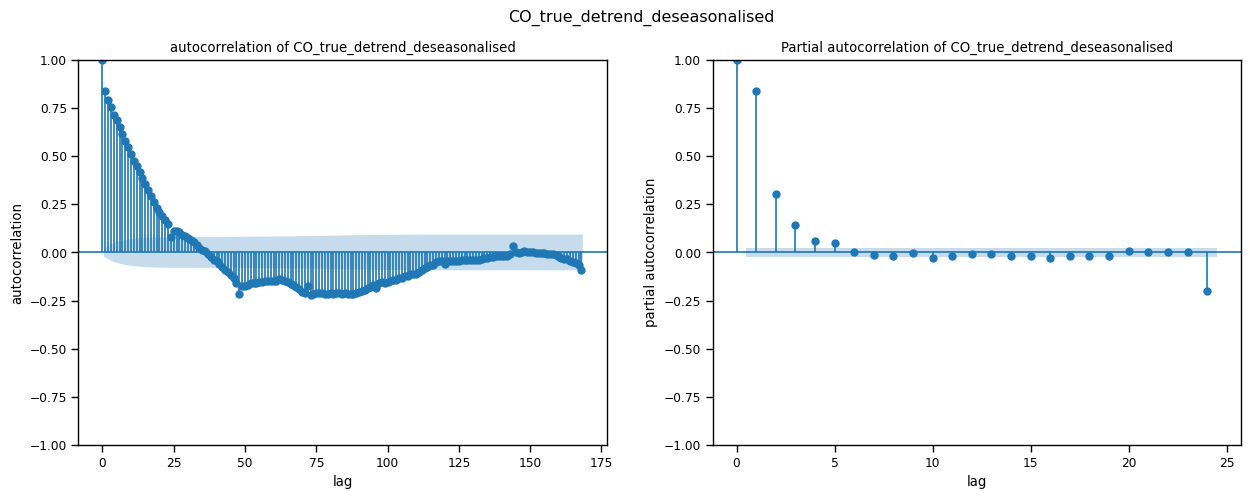

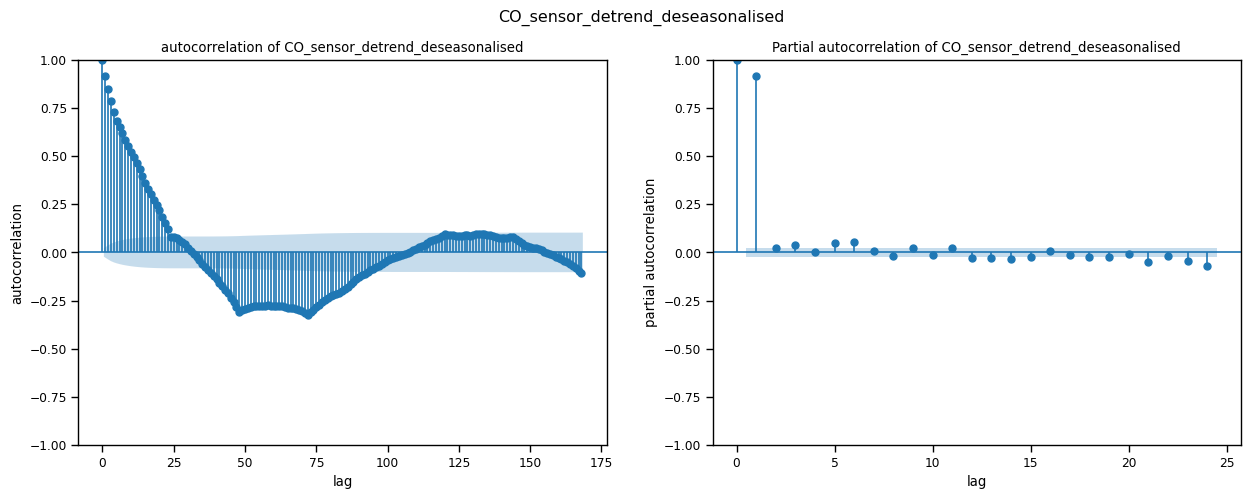

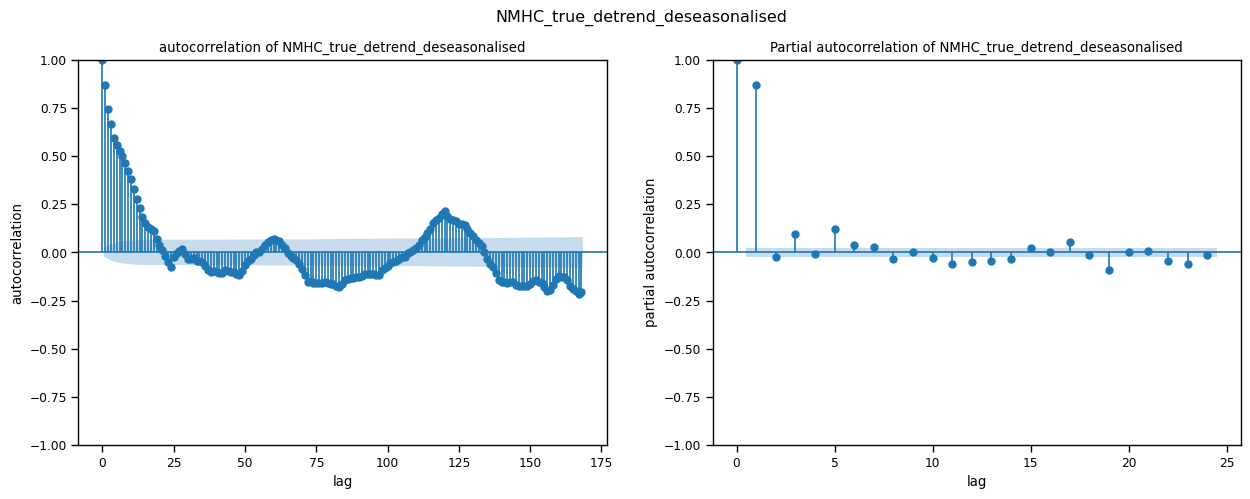

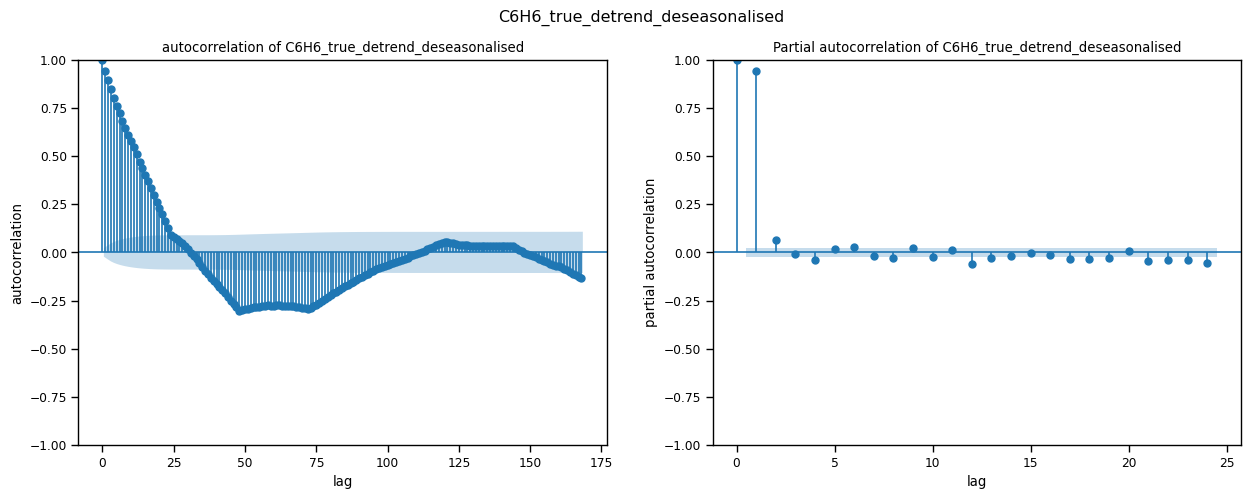

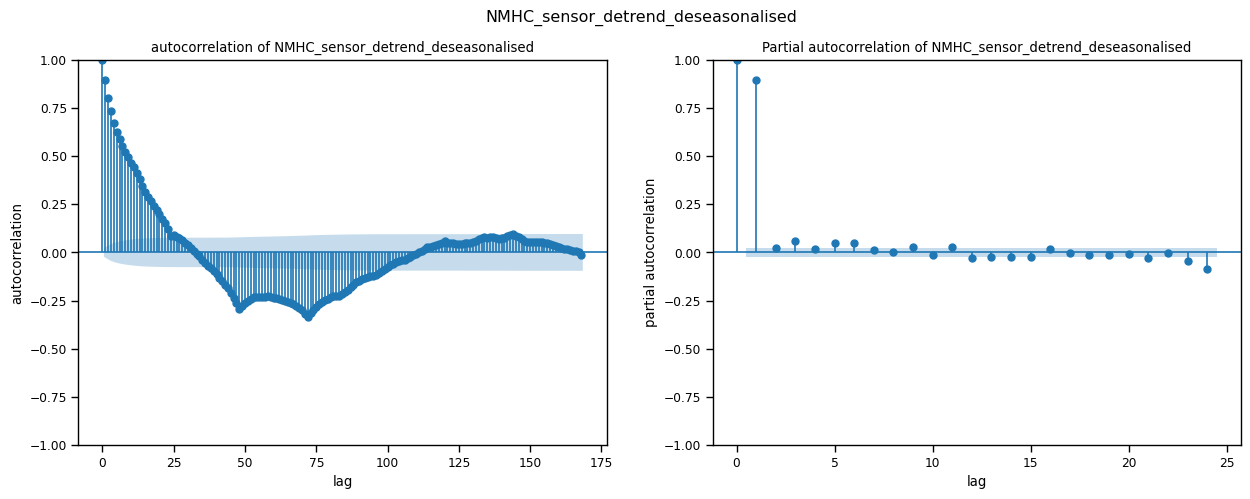

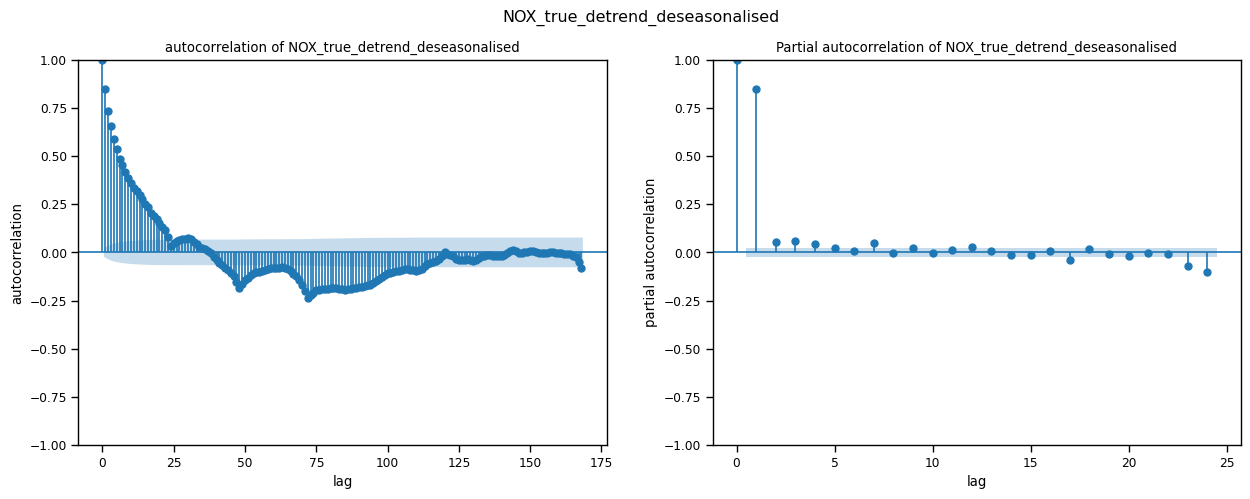

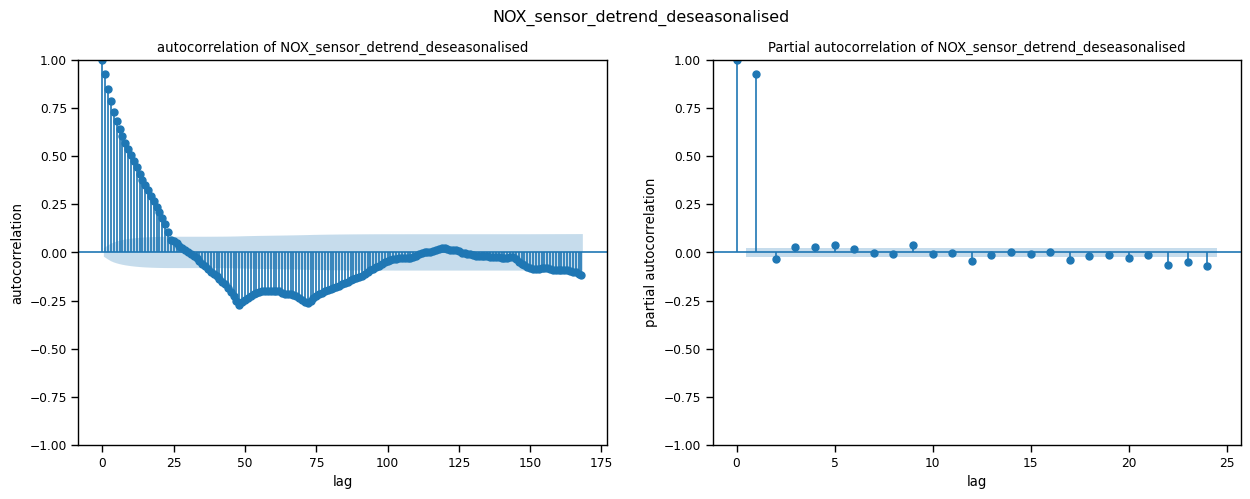

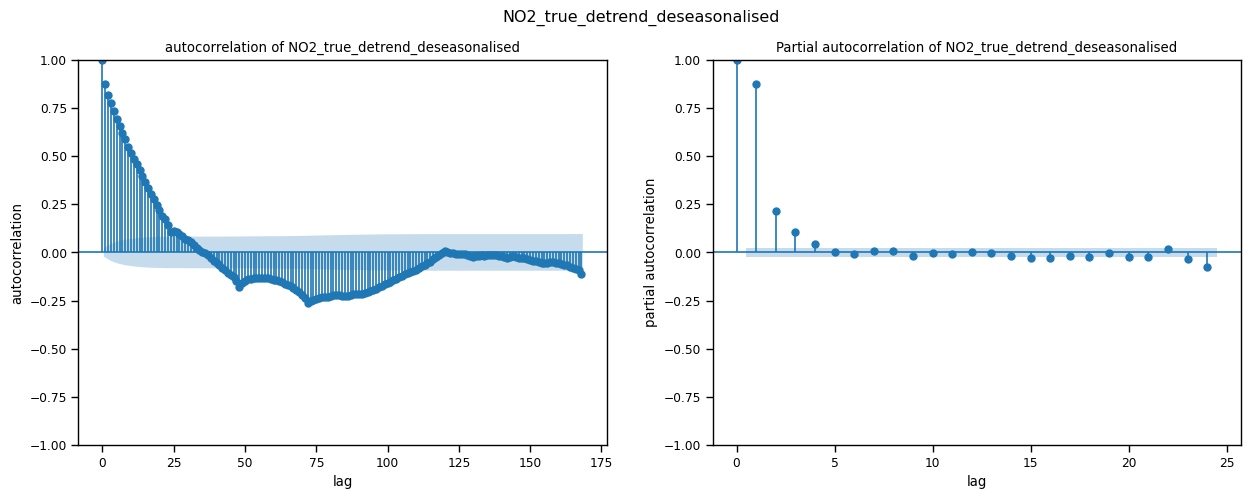

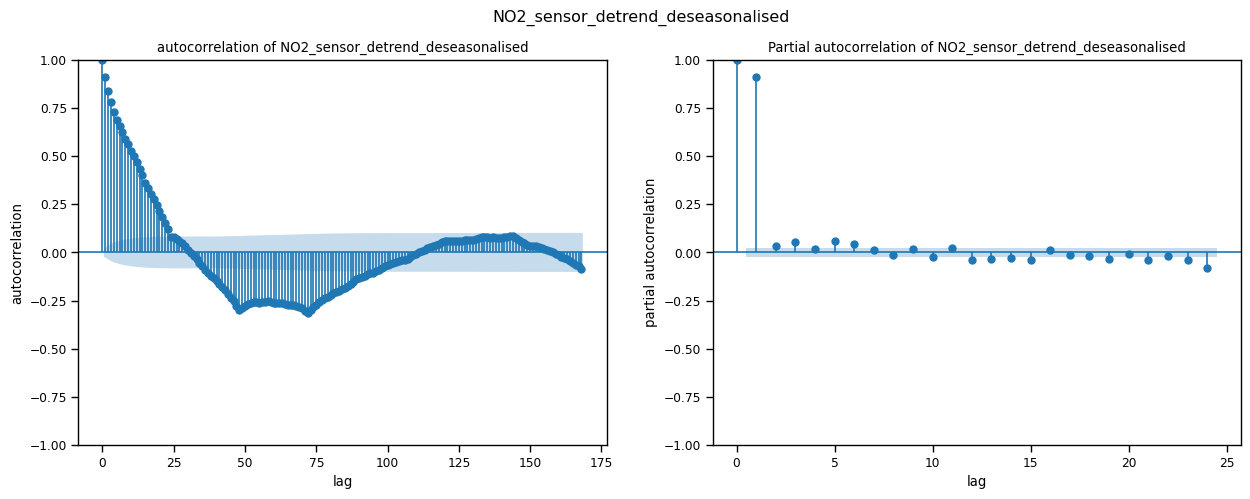

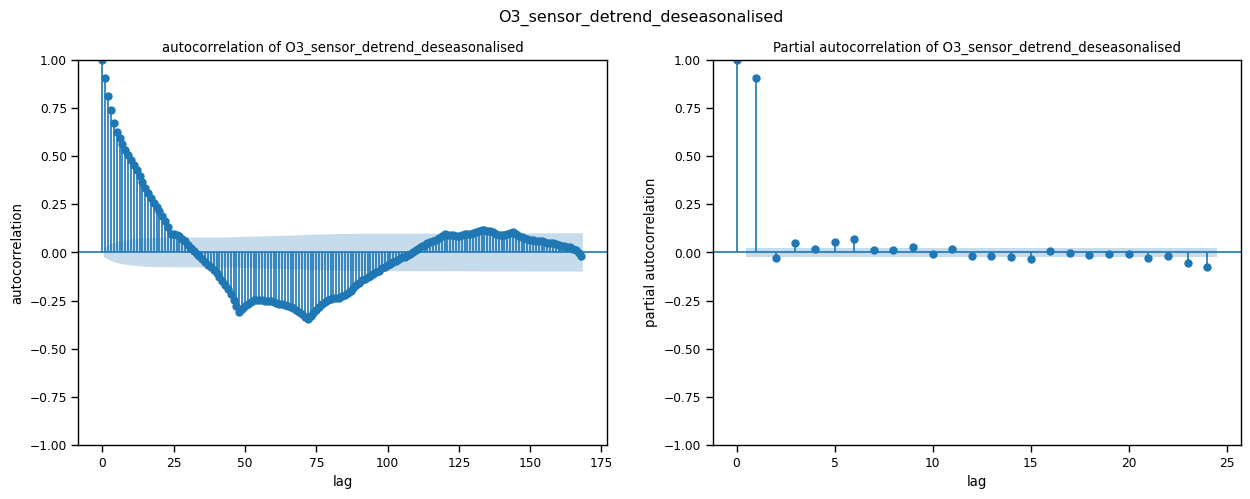

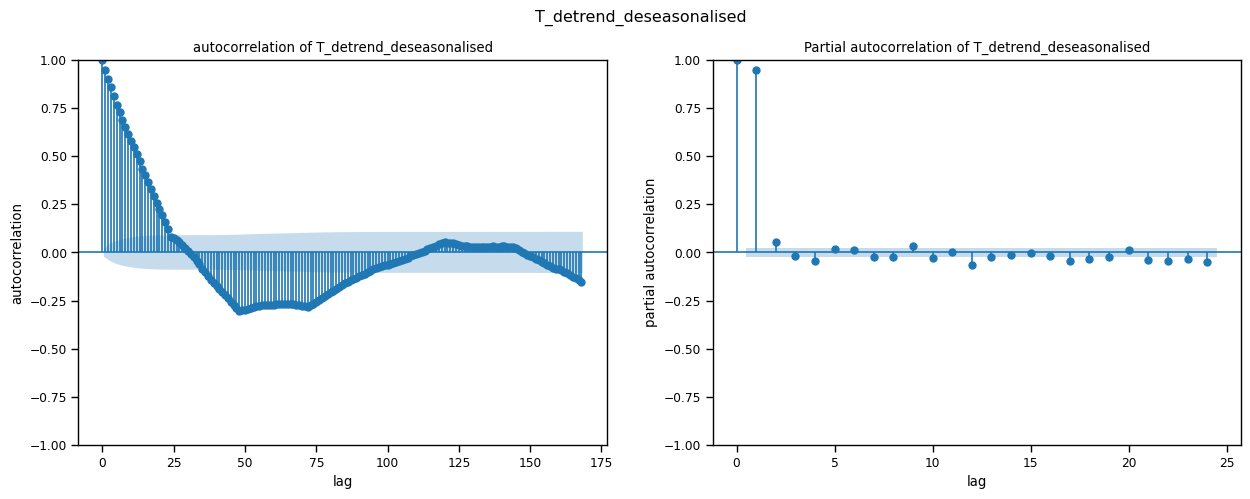

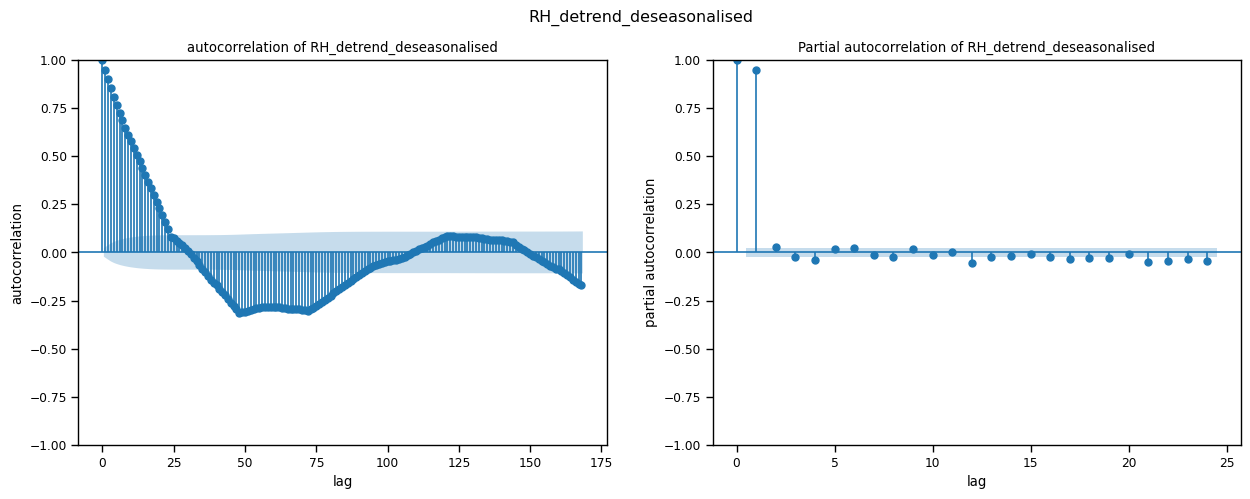

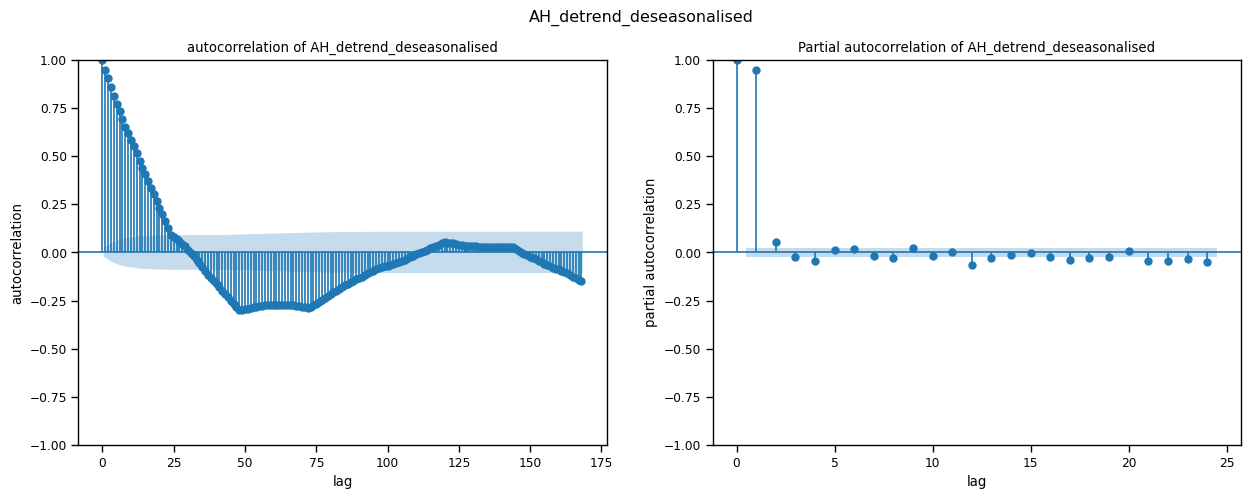

In [52]:
for i in[i for i in data.columns if "detrend" in i]:
    fig,ax=plt.subplots(ncols=2,figsize=[15,5])
    plot_acf(data[i].dropna(),lags=7*24,ax=ax[0])
    ax[0].set_title(f"autocorrelation of {i}")
    ax[0].set_xlabel("lag")
    ax[0].set_ylabel("autocorrelation")
    
    plot_pacf(data[i],lags=1*24,ax=ax[1],method="ywmle")
    ax[1].set_title(f"Partial autocorrelation of {i}")
    ax[1].set_xlabel("lag")
    ax[1].set_ylabel("partial autocorrelation")
    
    fig.suptitle(i)

The ACF decays more quickly now which means that data is closer to being stationary (the ACF decaying quickly is one indicator of a stationary time series). The PACF suggests that a lag of 1 and with less confidence 2 hours could be useful.

### cross correlation function

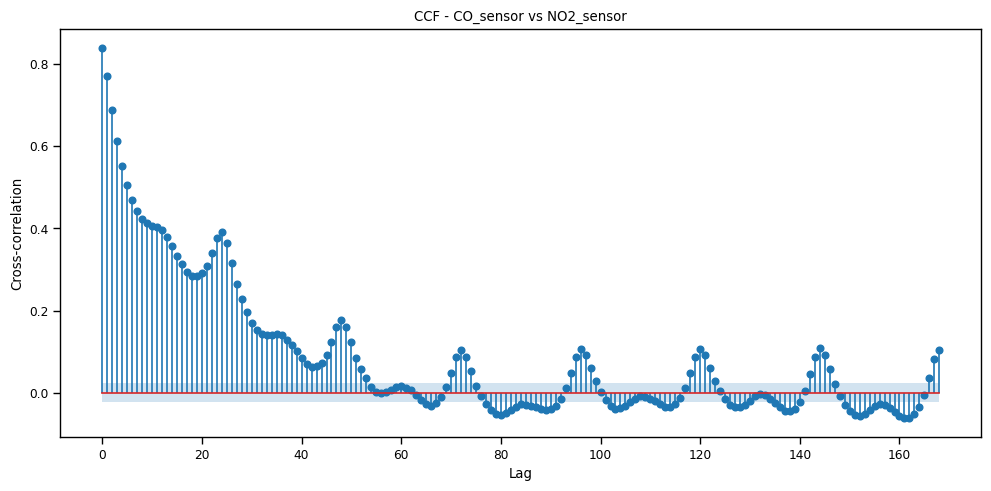

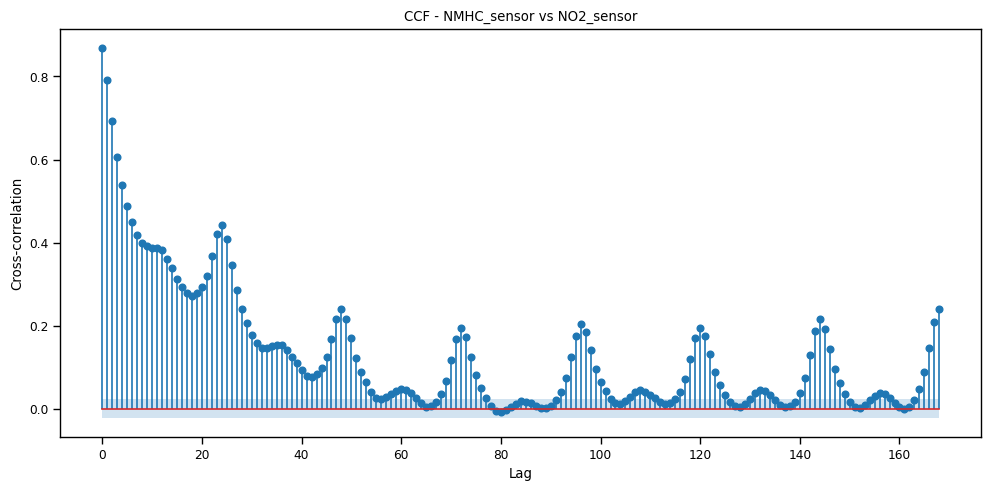

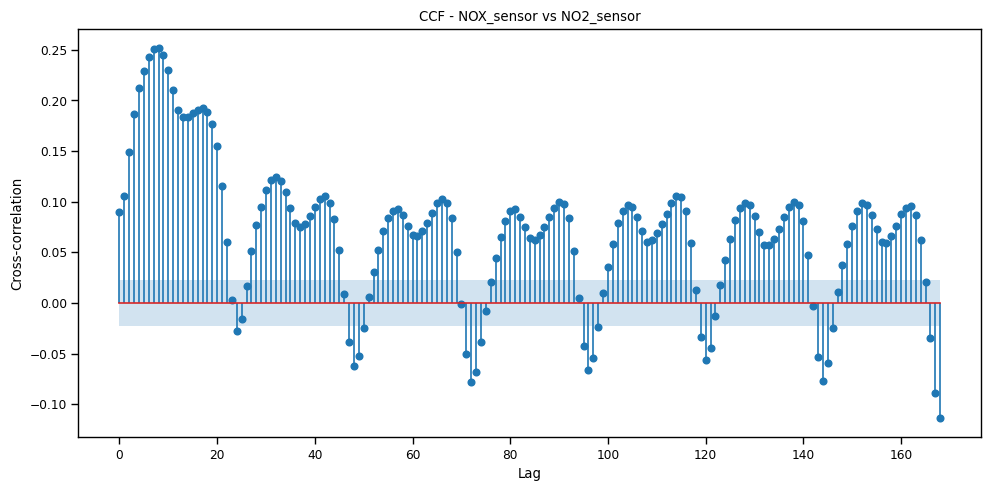

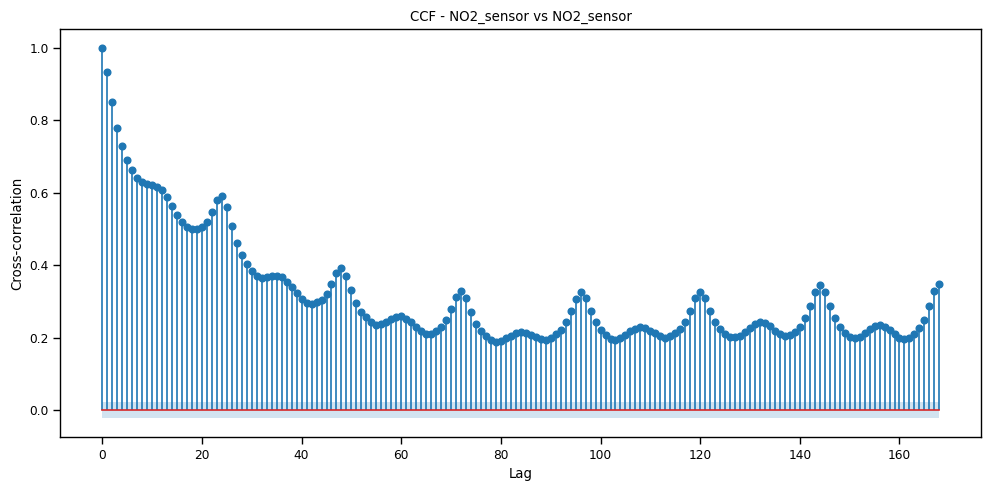

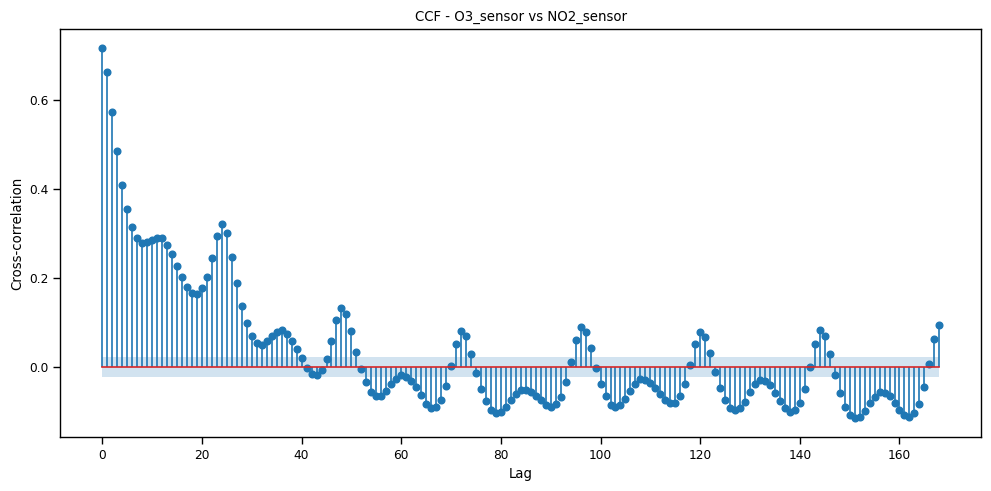

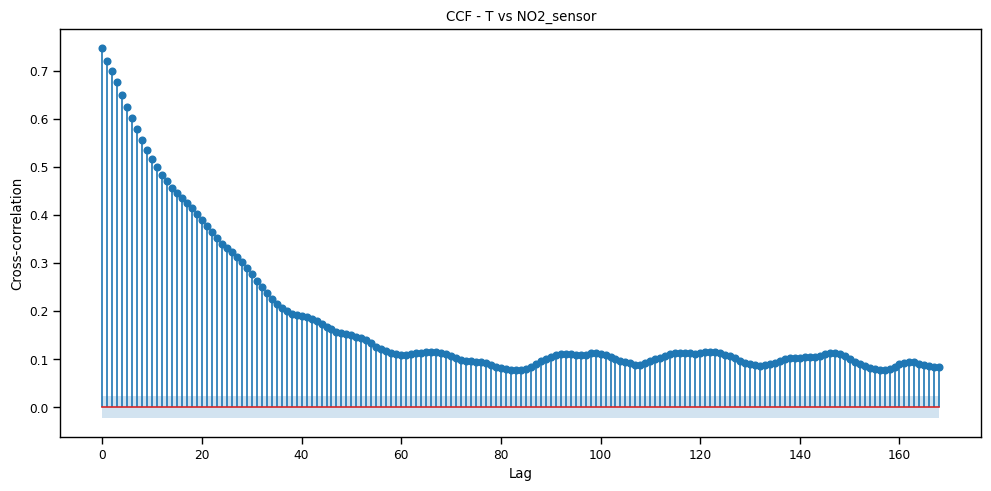

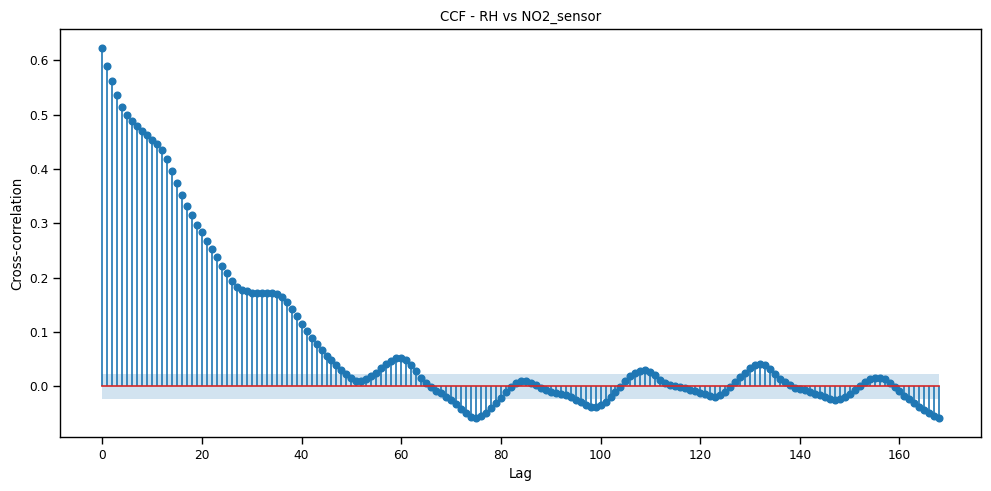

In [57]:
for col in [
    "CO_sensor",
    "NMHC_sensor",
    "NOX_sensor",
    "NO2_sensor",
    "O3_sensor",
    "T",
    "RH"]:
    ax = plot_ccf(y=data.dropna()["NO2_sensor"], x=data.dropna()[col], lags=24 * 7)
    ax.set_title(f"CCF - {col} vs NO2_sensor")
    ax.set_ylabel("Cross-correlation")
    ax.set_xlabel("Lag")
    plt.tight_layout()
